In [ ]:
!pip install geopandas
!pip install folium
!pip install haversine

In [17]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from haversine import haversine
from shapely.geometry import Point, Polygon, LineString
import math
from tqdm.notebook import tqdm

In [69]:
Bike_Station=pd.read_csv('/content/drive/My Drive/Compas/compas/SBJ_2007_001/02.자전거스테이션.csv')
space_plan=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/10.도시계획(공간시설).geojson')
culphy_plan=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/11.도시계획(공공문화제육시설).geojson')
traffic_plan=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/12.도시계획(교통시설).geojson')
wetland_cons=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/13.용도지역지구(습지보호지역).geojson')
build_road=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/15.도로명주소_건물.geojson')
road_road=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/16.도로명주소_도로.geojson')
build_dist=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/17.일반건물 분포도(100M X 100M).geojson')
fes_space=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/18.행사장_공간정보.csv')
subway_station=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/19.전철역_공간정보.csv')
bus_station=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/20.고양시 버스정류소.csv')
parking_info=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/22.주차장정보.csv')
theat_muse=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/26.고양시 공연장 박물관 정보.csv')
physi_curr=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/27.고양시 체육시설 현황 정보.csv')
duk_godo=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/30.고양시_덕양구_고도.geojson')
ilsansu_godo=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/32.고양시_일산서구_고도.geojson')
ilsando_godo=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/31.고양시_일산동구_고도.geojson')
goyang_road=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/33.고양시_인도.geojson')

In [41]:
lscp_pop_and_bike = pd.read_pickle('/content/drive/My Drive/Compas/compas/csv 파일 여기로!/lscp_pop_and_bike_300.pickle')
# lscp_pop_and_bike = lscp_pop_and_bike[['좌표', '대여수', '반납수', '총 이용횟수', '스테이션', '주거인구']]
lscp_pop_and_bike

,좌표,대여수,반납수,총 이용횟수,스테이션,주거인구,버스_승하차수,지하철_승하차수,유동인구
0,"(37.59052639593674, 126.88041634904563)",0.0,0.0,0.0,[155],74.0,0.0,0.0,0.0
1,"(37.590546726423185, 126.88154829019997)",0.0,0.0,0.0,[155],36.0,0.0,0.0,0.0
2,"(37.59142713034578, 126.88039079257342)",0.0,0.0,0.0,[155],135.0,0.0,0.0,0.0
3,"(37.59144746148929, 126.88152274735107)",0.0,0.0,0.0,[155],82.0,0.0,0.0,0.0
4,"(37.59146778178655, 126.88265470326604)",0.0,0.0,0.0,[155],36.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3229,"(37.70445091519225, 126.75467703178417)",6093.0,4582.0,10675.0,[346],3562.0,5665.0,0.0,5665.0
3230,"(37.704472506609626, 126.75581060819373)",6093.0,4582.0,10675.0,[346],2661.0,3486.0,0.0,3486.0
3231,"(37.70466633943072, 126.7660128502553)",473.0,406.0,879.0,[351],7713.0,21185.0,0.0,21185.0
3232,"(37.70468782197291, 126.76714643873707)",473.0,406.0,879.0,[351],6526.0,21185.0,0.0,21185.0


In [74]:
mapper = lambda x: float(x.strip('\(').strip('\)').split(',')[0])
lscp_pop_and_bike['위도'] = lscp_pop_and_bike['좌표'].map(mapper)

mapper = lambda x: float(x.strip('\(').strip('\)').split(',')[1])
lscp_pop_and_bike['경도'] = lscp_pop_and_bike['좌표'].map(mapper)

In [75]:
lscp_pop_and_bike

,좌표,대여수,반납수,총 이용횟수,스테이션,주거인구,버스_승하차수,지하철_승하차수,유동인구,위도,경도
0,"(37.59052639593674, 126.88041634904563)",0.0,0.0,0.0,[155],74.0,0.0,0.0,0.0,37.590526,126.880416
1,"(37.590546726423185, 126.88154829019997)",0.0,0.0,0.0,[155],36.0,0.0,0.0,0.0,37.590547,126.881548
2,"(37.59142713034578, 126.88039079257342)",0.0,0.0,0.0,[155],135.0,0.0,0.0,0.0,37.591427,126.880391
3,"(37.59144746148929, 126.88152274735107)",0.0,0.0,0.0,[155],82.0,0.0,0.0,0.0,37.591447,126.881523
4,"(37.59146778178655, 126.88265470326604)",0.0,0.0,0.0,[155],36.0,0.0,0.0,0.0,37.591468,126.882655
...,...,...,...,...,...,...,...,...,...,...,...
3229,"(37.70445091519225, 126.75467703178417)",6093.0,4582.0,10675.0,[346],3562.0,5665.0,0.0,5665.0,37.704451,126.754677
3230,"(37.704472506609626, 126.75581060819373)",6093.0,4582.0,10675.0,[346],2661.0,3486.0,0.0,3486.0,37.704473,126.755811
3231,"(37.70466633943072, 126.7660128502553)",473.0,406.0,879.0,[351],7713.0,21185.0,0.0,21185.0,37.704666,126.766013
3232,"(37.70468782197291, 126.76714643873707)",473.0,406.0,879.0,[351],6526.0,21185.0,0.0,21185.0,37.704688,126.767146


In [76]:
Bike_Station

,Station_ID,STATION_NAME,거치대 수량,위도,경도
0,101,어울림마을 701동 앞,20,37.654775,126.834584
1,103,대림e-편한세상106동,20,37.660442,126.840377
2,104,탄현마을8단지,25,37.698523,126.766042
3,105,KT 덕양지사 앞,20,37.655244,126.839261
4,106,원당역 앞 공영주차장,30,37.653410,126.842530
...,...,...,...,...,...
159,350,★하이파크5단지 502동앞 버스정류장,20,37.697867,126.753089
160,351,◆일산에듀포레 푸르지오,40,37.702259,126.767231
161,352,◆꿈에그린203동앞,40,37.666425,126.749244
162,353,◆꿈에그린106동앞,40,37.666720,126.750784


In [ ]:
Bike_Station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Station_ID    164 non-null    int64  
 1   STATION_NAME  164 non-null    object 
 2   거치대 수량        164 non-null    int64  
 3   위도            164 non-null    float64
 4   경도            164 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 6.5+ KB


In [22]:
lscp_base=pd.DataFrame(np.array(lscp_pop_and_bike['좌표']),columns=['좌표'])
lscp_base

,좌표
0,"(37.59052639593674, 126.88041634904563)"
1,"(37.590546726423185, 126.88154829019997)"
2,"(37.59142713034578, 126.88039079257342)"
3,"(37.59144746148929, 126.88152274735107)"
4,"(37.59146778178655, 126.88265470326604)"
...,...
3229,"(37.70445091519225, 126.75467703178417)"
3230,"(37.704472506609626, 126.75581060819373)"
3231,"(37.70466633943072, 126.7660128502553)"
3232,"(37.70468782197291, 126.76714643873707)"


In [16]:
center = (37.647972, 126.835398)
zoom = 13

m = folium.Map(location=center, zoom_start=zoom)

for index, row in Bike_Station.iterrows():
    folium.Marker([row['위도'], row['경도']]).add_to(m)   
for index, row in lscp_pop_and_bike.iterrows():  
    folium.Circle([row['위도'], row['경도']],
                  radius = 3, color = 'red' ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

#Multipolygon

In [ ]:
def geo_dis(lscp_pop, target):
  lscp=[]
  target_nm=target.columns.tolist()[[(t.find('NAME')>=0) | (t.lower().find('dgm_nm')>=0) | 
                                     (t.lower().find('bdtyp_cd')>=0) | (t.lower().find('mnum')>=0) for t in target.columns.tolist()].index(True)]
  for sta, lat, long in tqdm(zip(lscp_pop['좌표'],lscp_pop['위도'],lscp_pop['경도'])):
    for nm, geometry in zip(target[target_nm],target['geometry']):
      h=[]
      x = (lat, long)
      points = [point for polygon in geometry for point in polygon.exterior.coords[:]]
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
      if min(h)<=300:
        lscp.append([sta,nm,min(h)])
  return lscp

#### 11.도시계획(공공문화제육시설).geojson

In [ ]:
# 11.도시계획(공공문화제육시설).geojson
culphy_plan.head()

,DGM_NM,DGM_AR,DGM_LT,geometry
0,기타 사회복지시설,2627,211,"MULTIPOLYGON (((126.86736 37.62940, 126.86761 ..."
1,초등학교,13070,461,"MULTIPOLYGON (((126.90542 37.71515, 126.90619 ..."
2,기타 사회복지시설,560,95,"MULTIPOLYGON (((126.78826 37.67892, 126.78836 ..."
3,초등학교,12000,444,"MULTIPOLYGON (((126.81611 37.68054, 126.81659 ..."
4,유치원,3000,219,"MULTIPOLYGON (((126.81012 37.68488, 126.81062 ..."


In [ ]:
bike_culphy=pd.DataFrame(geo_dis(lscp_pop_and_bike,culphy_plan),columns=['좌표','Culphy_NM','Harv_dis'])

In [ ]:
bike_culphy

,좌표,Culphy_NM,Harv_dis
0,"(37.591589475796866, 126.88944646260485)",유치원,275.211124
1,"(37.591609720169394, 126.89057842646388)",유치원,177.386992
2,"(37.59249021530017, 126.88942101398723)",초등학교,259.346074
3,"(37.59249021530017, 126.88942101398723)",유치원,277.658457
4,"(37.59251046032699, 126.89055299147059)",초등학교,229.927344
...,...,...,...
8859,"(37.70468782197291, 126.76714643873707)",기타 공공직업훈련시설,214.663088
8860,"(37.70468782197291, 126.76714643873707)",기타 사회복지시설,229.592611
8861,"(37.70468782197291, 126.76714643873707)",기타 사회복지시설,184.192161
8862,"(37.70470929362739, 126.76828002842278)",기타 사회복지시설,202.318520


#### 12.도시계획(교통시설).geojson

In [ ]:
# 12.도시계획(교통시설).geojson
traffic_plan.head()

,DGM_NM,DGM_AR,DGM_LT,geometry
0,노외주차장,1930,269,"MULTIPOLYGON (((126.89527 37.70315, 126.89514 ..."
1,노외주차장,1006,130,"MULTIPOLYGON (((126.79379 37.65890, 126.79391 ..."
2,노외주차장,1111,134,"MULTIPOLYGON (((126.91072 37.71903, 126.91076 ..."
3,노외주차장,631,104,"MULTIPOLYGON (((126.89455 37.62056, 126.89480 ..."
4,노외주차장,987,132,"MULTIPOLYGON (((126.87241 37.59324, 126.87251 ..."


In [ ]:
bike_traffic=pd.DataFrame(geo_dis(lscp_pop_and_bike,traffic_plan),columns=['좌표','Traffic_NM','Harv_dis'])
bike_traffic

,좌표,Traffic_NM,Harv_dis
0,"(37.59052639593674, 126.88041634904563)",일반철도,139.451979
1,"(37.59052639593674, 126.88041634904563)",일반철도,96.766305
2,"(37.59052639593674, 126.88041634904563)",일반철도,135.081623
3,"(37.590546726423185, 126.88154829019997)",일반철도,54.209674
4,"(37.590546726423185, 126.88154829019997)",일반철도,41.799406
...,...,...,...
5015,"(37.70380864367825, 126.76830704602578)",기타 주차장시설,205.704672
5016,"(37.70383010375218, 126.76944062321903)",기타 주차장시설,251.541520
5017,"(37.70466633943072, 126.7660128502553)",기타 주차장시설,158.558799
5018,"(37.70468782197291, 126.76714643873707)",기타 주차장시설,107.648719


#### 호수 체크

In [ ]:
bike_hosu=pd.DataFrame(geo_dis(lscp_pop_and_bike,space_plan.iloc[[14,166],:]),columns=['좌표','MNUS','Harv_dis'])
bike_hosu['Hosu_yes']=1
bike_hosu=lscp_base.merge(bike_hosu[['좌표','Hosu_yes']],on='좌표',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
bike_hosu['Hosu_yes']=bike_hosu['Hosu_yes'].astype(int)

In [ ]:
bike_hosu[bike_hosu['Hosu_yes']==1]

,좌표,Hosu_yes
945,"(37.647968045310535, 126.76997978979101)",1
946,"(37.647989462463734, 126.77111251903867)",1
947,"(37.64801086875125, 126.77224524948535)",1
948,"(37.64803226417304, 126.77337798113058)",1
990,"(37.64886870483049, 126.76995284667986)",1
...,...,...
1980,"(37.66756759731365, 126.75805653162732)",1
1981,"(37.66758913842159, 126.75918954945465)",1
1982,"(37.667610668656486, 126.76032256848838)",1
2028,"(37.66844669382088, 126.75689639510686)",1


In [ ]:
bike_hosu

,좌표,Hosu_yes
0,"(37.59052639593674, 126.88041634904563)",0
1,"(37.590546726423185, 126.88154829019997)",0
2,"(37.59142713034578, 126.88039079257342)",0
3,"(37.59144746148929, 126.88152274735107)",0
4,"(37.59146778178655, 126.88265470326604)",0
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",0
3230,"(37.704472506609626, 126.75581060819373)",0
3231,"(37.70466633943072, 126.7660128502553)",0
3232,"(37.70468782197291, 126.76714643873707)",0


#### 공원개수

In [ ]:
bike_park=pd.DataFrame(geo_dis(lscp_pop_and_bike,space_plan.iloc[[27, 28, 45, 53, 54, 55, 56, 57, 58, 59, 60, 61, 
                                                             63, 101, 160, 161, 162, 164, 165, 211, 212, 213, 
                                                             214, 215, 216, 219, 220, 222, 223, 228, 229, 232, 
                                                             233, 234, 236, 241, 247, 293, 297, 403,562, 581, 659, 730, 1091,1092,1093],:]),columns=['좌표','MNUS','Harv_dis'])
bike_park['Park_count']=1
# 아래는 유무만 판별하는 코드
# bike_park=bike_park[['Bike_Station','Park_yes']].drop_duplicates()
# 아래는 개수 더하는 코드
bike_park=bike_park[['좌표','Park_count']].groupby('좌표').agg('sum').reset_index()
bike_park.columns=['좌표','Park_count']
bike_park=lscp_base.merge(bike_park[['좌표','Park_count']],on='좌표',how='outer').fillna(0)
bike_park['Park_count']=bike_park['Park_count'].astype(int)

In [ ]:
bike_park['Park_count'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
bike_park

,좌표,Park_count
0,"(37.59052639593674, 126.88041634904563)",0
1,"(37.590546726423185, 126.88154829019997)",0
2,"(37.59142713034578, 126.88039079257342)",0
3,"(37.59144746148929, 126.88152274735107)",0
4,"(37.59146778178655, 126.88265470326604)",0
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",1
3230,"(37.704472506609626, 126.75581060819373)",1
3231,"(37.70466633943072, 126.7660128502553)",0
3232,"(37.70468782197291, 126.76714643873707)",0


In [ ]:
bike_culphy.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_culphy_plan_300.csv')
bike_traffic.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_traffic_plan_300.csv')
bike_hosu.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_hosu_300.csv')
bike_park.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_park_300.csv')

# Point(X, Y)

In [68]:
def harv_dis(lscp_pop, target):
  lscp=[]
  target_nm=target.columns.tolist()[[(t.find('NAME')>=0) | (t.lower().find('station_nm')>=0) | 
                                     (t.lower().find('parking_nm')>=0) | (t.lower().find('place_nm')>=0)|
                                     (t.find('명칭')>=0) for t in target.columns.tolist()].index(True)]
  for sta, lat, long in tqdm(zip(lscp_pop['좌표'],lscp_pop['위도'],lscp_pop['경도'])):
    try:
      for nm, t_lat, t_long in zip(target[target_nm],target['위도'],target['경도']):
        t_lat=float(t_lat)
        t_long=float(t_long)
        x = (lat, long)
        y = (t_lat, t_long) 
        h = haversine(x, y, unit='m')
        if h <=300:
          lscp.append([sta,nm,h])
    except:
      try:
        for nm, t_lat, t_long, t_count in zip(target[target_nm],target['Y'],target['X'],target['count']):
          t_lat=float(t_lat)
          t_long=float(t_long)
          x = (lat, long)
          y = (t_lat, t_long) 
          h = haversine(x, y, unit='m')
          if h <=300:
            lscp.append([sta,nm,t_lat,t_long,t_count,h])
      except:
        for nm, t_lat, t_long in zip(target[target_nm],target['Y'],target['X']):
          t_lat=float(t_lat)
          t_long=float(t_long)
          x = (lat, long)
          y = (t_lat, t_long) 
          h = haversine(x, y, unit='m')
          if h <=300:
            lscp.append([sta,nm,t_lat,t_long,h])
  return lscp

#### 데이터 보기


In [ ]:
fes_space[fes_space['명칭']=='KINTEX']

,명칭,위도,경도,geometry
0,KINTEX,37.669028,126.746184,None


In [ ]:
fes_space['위도']=fes_space['위도'].astype('float64')
fes_space['경도']=fes_space['경도'].astype('float64')


In [ ]:
center = fes_space['위도'].mean(), fes_space['경도'].mean()
zoom = 15
f = folium.Map(location = center, 
               zoom_start = zoom,
               tiles = 'http://api.vworld.kr/req/wmts/1.0.0/FEDE7284-9E9D-3624-BCA7-DDB9767882ED/Base/{z}/{y}/{x}.png',
               attr = '고양시'
              )
for index, row in fes_space.iterrows():
    folium.Marker([row['위도'], row['경도']]).add_to(f)
    folium.Circle([row['위도'], row['경도']],
                  radius = 250, color = 'red' ).add_to(f)
f

KINTEX는 250m를 추가한 거리로,   
호수공원은 도시계획 데이터를 활용하는 쪽으로 (166, 14)    
기타 공원 (27, 28, 45, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 101, 160,161,162, 164, 165, 211, 212, 213, 214, 215, 216, 219, 220, 222, 223, 228, 229, 232, 233, 234, 236, 241, 247, 293, 297, 403,562, 581, 659, 730, 1091,1092,1093,1094)

In [ ]:
physi_curr['GBN'].unique()

array(['육상', '축구장', '수영장', '빙상장', '풋살구장', '배드민턴장', '테니스장', '게이트볼장',
       '파크골프장', '족구장', '인라인하키', '인라인스케이트장', '야구장', '인공암벽장', '농구장', '궁도장',
       '탁구장', '스쿼시', '골프연습장', '헬스장', '클라이밍', '다목적운동장', '야외배드민턴장', '국궁장',
       '실내배드민턴장', 'X게임장', '골프', '다목적시설'], dtype=object)

#### 주차장 (22.주차장정보.csv)

In [70]:
# 22.주차장정보.csv
parking_info.head()

,parking_nm,road_nm_addr,lot_num_addr,space,X,Y,geometry
0,고양시청 부설주차장,경기도 고양시 덕양구 고양시청로10,경기도 고양시 덕양구 주교동 600,140,126.83207210,37.65804217,None
1,고양제1,경기도 고양시 덕양구 벽제관로 8,경기도 고양시 덕양구 고양동 195-2,94,126.90386130,37.70378261,None
2,고양제2,경기도 고양시 덕양구 혜음로 103,경기도 고양시 덕양구 고양동 444-1,31,126.90534690,37.71021294,None
3,노상 1권역,경기도 고양시 덕양구 고양시청로 10,경기도 고양시 덕양구 주교동 600,97,126.83195970,37.65841450,None
4,노상 3권역,경기도 고양시 덕양구 은빛로 39,경기도 고양시 덕양구 화정동 909,123,126.83217320,37.63809581,None


In [71]:
parking_info['count']=parking_info['space']

In [77]:
lscp_parking=pd.DataFrame(harv_dis(lscp_pop_and_bike,parking_info),columns=['좌표','Parking','lat','long','Space_count','Harv_dis'])
lscp_parking.head()

,좌표,Parking,lat,long,Space_count,Harv_dis
0,"(37.61215952486722, 126.83109005897643)",행신 제4(임시),37.614094,126.83254,111,250.158026
1,"(37.61215952486722, 126.83109005897643)",행신제3,37.614278,126.83253,43,267.537057
2,"(37.61215952486722, 126.83109005897643)",행신제4,37.614094,126.83254,44,250.158026
3,"(37.612180338503336, 126.83222229136189)",행신 제4(임시),37.614094,126.83254,111,214.629627
4,"(37.612180338503336, 126.83222229136189)",행신제3,37.614278,126.83253,43,234.808998


In [80]:
lscp_parking['Space_count']=lscp_parking['Space_count'].astype(int)
bike_parking=lscp_parking[['좌표','Space_count']].groupby('좌표').agg('sum').reset_index()
bike_parking=lscp_base.merge(bike_parking,on='좌표',how='outer').fillna(0)
bike_parking['Space_count']=bike_parking['Space_count'].astype(int)

In [81]:
bike_parking

,좌표,Space_count
0,"(37.59052639593674, 126.88041634904563)",0
1,"(37.590546726423185, 126.88154829019997)",0
2,"(37.59142713034578, 126.88039079257342)",0
3,"(37.59144746148929, 126.88152274735107)",0
4,"(37.59146778178655, 126.88265470326604)",0
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",0
3230,"(37.704472506609626, 126.75581060819373)",0
3231,"(37.70466633943072, 126.7660128502553)",0
3232,"(37.70468782197291, 126.76714643873707)",0


#### 26.고양시 공연장 박물관 정보.csv

In [82]:
lscp_cult=pd.DataFrame(harv_dis(lscp_pop_and_bike,theat_muse),columns=['좌표','Culture','lat','long','Harv_dis'])
lscp_cult

,좌표,Culture,lat,long,Harv_dis
0,"(37.593471872291964, 126.89392353546238)",포마자동차디자인미술관,37.591783,126.896439,290.499502
1,"(37.623868638775505, 126.83074974068954)",토당청소년수련관,37.625808,126.829787,231.701191
2,"(37.62388946115576, 126.83188215039145)",토당청소년수련관,37.625808,126.829787,282.037257
3,"(37.62470680446452, 126.82732629116046)",토당청소년수련관,37.625808,126.829787,248.932036
4,"(37.62476933877171, 126.83072355419952)",토당청소년수련관,37.625808,126.829787,141.901769
...,...,...,...,...,...
522,"(37.672478329203756, 126.77944983172573)",민속전시관,37.670204,126.780040,258.221061
523,"(37.672499667162775, 126.78058294073638)",민속전시관,37.670204,126.780040,259.745525
524,"(37.67252099424632, 126.78171605094212)",민속전시관,37.670204,126.780040,296.917530
525,"(37.68943196557951, 126.72337828490537)",3 NEW THEATRE,37.690864,126.725248,228.975739


In [83]:
lscp_cult['Culture_count']=1
bike_cult=lscp_cult[['좌표','Culture_count']].groupby('좌표').agg('sum').reset_index()
bike_cult=lscp_base.merge(bike_cult,on='좌표',how='outer').fillna(0)
bike_cult['Culture_count']=bike_cult['Culture_count'].astype(int)
bike_cult

,좌표,Culture_count
0,"(37.59052639593674, 126.88041634904563)",0
1,"(37.590546726423185, 126.88154829019997)",0
2,"(37.59142713034578, 126.88039079257342)",0
3,"(37.59144746148929, 126.88152274735107)",0
4,"(37.59146778178655, 126.88265470326604)",0
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",0
3230,"(37.704472506609626, 126.75581060819373)",0
3231,"(37.70466633943072, 126.7660128502553)",0
3232,"(37.70468782197291, 126.76714643873707)",0


#### 27.고양시 체육시설 현황 정보.csv

In [84]:
lscp_physi=pd.DataFrame(harv_dis(lscp_pop_and_bike,physi_curr),columns=['좌표','Physical','lat','long','Harv_dis'])
lscp_physi

,좌표,Physical,lat,long,Harv_dis
0,"(37.59425116863577, 126.88710610728546)",향동체육공원,37.596248,126.888177,241.252508
1,"(37.59425116863577, 126.88710610728546)",향동체육공원,37.596248,126.888177,241.252508
2,"(37.59425116863577, 126.88710610728546)",향동체육공원,37.596248,126.888177,241.252508
3,"(37.59425116863577, 126.88710610728546)",향동체육공원,37.596248,126.888177,241.252508
4,"(37.59427143666627, 126.88823810975214)",향동체육공원,37.596248,126.888177,219.850055
...,...,...,...,...,...
1827,"(37.70442931288754, 126.75354345658516)",덕이공원,37.701871,126.754423,294.807957
1828,"(37.70442931288754, 126.75354345658516)",덕이공원,37.701871,126.754423,294.807957
1829,"(37.70445091519225, 126.75467703178417)",덕이공원,37.701871,126.754423,287.743098
1830,"(37.70445091519225, 126.75467703178417)",덕이공원,37.701871,126.754423,287.743098


In [85]:
lscp_physi['Sport_count']=1
bike_physi=lscp_physi[['좌표','Sport_count']].groupby('좌표').agg('sum').reset_index()
bike_physi=lscp_base.merge(bike_physi,on='좌표',how='outer').fillna(0)
bike_physi['Sport_count']=bike_physi['Sport_count'].astype(int)
bike_physi

,좌표,Sport_count
0,"(37.59052639593674, 126.88041634904563)",0
1,"(37.590546726423185, 126.88154829019997)",0
2,"(37.59142713034578, 126.88039079257342)",0
3,"(37.59144746148929, 126.88152274735107)",0
4,"(37.59146778178655, 126.88265470326604)",0
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",3
3230,"(37.704472506609626, 126.75581060819373)",0
3231,"(37.70466633943072, 126.7660128502553)",0
3232,"(37.70468782197291, 126.76714643873707)",0


#### 킨텍스

In [86]:
lscp_fes=pd.DataFrame(harv_dis(lscp_pop_and_bike,fes_space[fes_space['명칭']=='KINTEX']),columns=['좌표','KINTEX','Harv_dis'])
bike_fes=lscp_base.merge(lscp_fes.iloc[:,:-1],on='좌표',how='outer').fillna(0)
bike_fes['KINTEX'][bike_fes['KINTEX']=='KINTEX']=1

bike_fes

,좌표,KINTEX
0,"(37.59052639593674, 126.88041634904563)",0
1,"(37.590546726423185, 126.88154829019997)",0
2,"(37.59142713034578, 126.88039079257342)",0
3,"(37.59144746148929, 126.88152274735107)",0
4,"(37.59146778178655, 126.88265470326604)",0
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",0
3230,"(37.704472506609626, 126.75581060819373)",0
3231,"(37.70466633943072, 126.7660128502553)",0
3232,"(37.70468782197291, 126.76714643873707)",0


In [87]:
bike_fes[bike_fes['KINTEX']==1]

,좌표,KINTEX
1930,"(37.66645094586167, 126.74675366156114)",1
1958,"(37.66730825593421, 126.74446041202023)",1
1960,"(37.66732992751584, 126.74559341532326)",1
1962,"(37.66735158822487, 126.74672641983997)",1
1964,"(37.667373238061245, 126.74785942556983)",1
2007,"(37.66818721358896, 126.74330012598689)",1
2008,"(37.668208896743366, 126.74443314174567)",1
2010,"(37.66823056902485, 126.74556615871887)",1
2012,"(37.668252230433374, 126.74669917690576)",1
2014,"(37.6682738809689, 126.74783219630585)",1


#### 지하철

In [88]:
sub_pop=pd.read_csv('/content/drive/My Drive/Compas/compas/csv 파일 여기로!/subway_merged.csv')
sub_pop = sub_pop[1:] #대곡 2개라서 하나만
sub_pop=sub_pop[['역명','지하철_위도','지하철_경도','승하차_연간합계']]
sub_pop.columns=['Station_NM','Y','X','count']
sub_pop

,Station_NM,Y,X,count
1,대화,37.675846,126.747206,10008025
2,일산,37.682007,126.770067,6808074
3,백석,37.642953,126.788148,8533226
4,대곡,37.631615,126.811047,1094752
5,강매,37.612290,126.844436,1859720
6,백마,37.658431,126.794067,4733842
7,능곡,37.618765,126.820838,2637855
8,풍산,37.671815,126.786528,3577046
9,행신,37.612170,126.834117,5568132
10,화전,37.603298,126.867947,1799161


In [89]:
lscp_sub=pd.DataFrame(harv_dis(lscp_pop_and_bike,sub_pop),columns=['좌표','Sub_Station','lat','long','Sub_pop','Harv_dis'])
lscp_sub_pop=lscp_sub[['좌표','Sub_pop']].groupby('좌표').agg('sum').reset_index()
lscp_sub_pop=lscp_base.merge(lscp_sub_pop,on='좌표',how='outer').fillna(0)
lscp_sub_pop['Sub_pop']=lscp_sub_pop['Sub_pop'].astype(int)
lscp_sub_pop

,좌표,Sub_pop
0,"(37.59052639593674, 126.88041634904563)",0
1,"(37.590546726423185, 126.88154829019997)",0
2,"(37.59142713034578, 126.88039079257342)",0
3,"(37.59144746148929, 126.88152274735107)",0
4,"(37.59146778178655, 126.88265470326604)",0
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",0
3230,"(37.704472506609626, 126.75581060819373)",0
3231,"(37.70466633943072, 126.7660128502553)",0
3232,"(37.70468782197291, 126.76714643873707)",0


#### 버스

In [90]:
bus_pop = pd.read_csv('/content/drive/My Drive/Compas/compas/csv 파일 여기로!/bus_merged.csv')
bus_pop.columns=['ID','Station_NM','district','Y','X','count']
bus_pop

,ID,Station_NM,district,Y,X,count
0,219000619,신일비즈니스고등학교,대화동,37.683296,126.760592,3496.0
1,219000587,중앙공원삼거리,일산동,37.688934,126.776989,2666.0
2,219000624,문촌마을14.19단지,주엽동,37.671011,126.752451,0.0
3,219000623,문촌마을14.19단지,대화동,37.671448,126.752452,298.0
4,219000586,중앙공원삼거리,중산동,37.688771,126.777412,25.0
...,...,...,...,...,...,...
2227,218000940,고양시청후문,주교동,37.659090,126.832676,788.0
2228,219000927,사리현동문아파트,사리현동,37.699382,126.845347,5868.0
2229,218000530,서울시립고양병원입구,내유동,37.712236,126.852005,5483.0
2230,218001000,옥빛마을14.15단지,화정동,37.628699,126.833325,5023.0


In [91]:
lscp_bus=pd.DataFrame(harv_dis(lscp_pop_and_bike,bus_pop),columns=['좌표','Bus_Station','lat','long','Bus_pop','Harv_dis'])
lscp_bus_pop=lscp_bus[['좌표','Bus_pop']].groupby('좌표').agg('sum').reset_index()
lscp_bus_pop=lscp_base.merge(lscp_bus_pop,on='좌표',how='outer').fillna(0)
lscp_bus_pop['Bus_pop']=lscp_bus_pop['Bus_pop'].astype(int)
lscp_bus_pop

,좌표,Bus_pop
0,"(37.59052639593674, 126.88041634904563)",0
1,"(37.590546726423185, 126.88154829019997)",0
2,"(37.59142713034578, 126.88039079257342)",0
3,"(37.59144746148929, 126.88152274735107)",0
4,"(37.59146778178655, 126.88265470326604)",0
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",5665
3230,"(37.704472506609626, 126.75581060819373)",3486
3231,"(37.70466633943072, 126.7660128502553)",21185
3232,"(37.70468782197291, 126.76714643873707)",21185


In [92]:
bike_sub=lscp_base.merge(lscp_sub_pop,on='좌표',how='outer')
sub_bus=bike_sub.merge(lscp_bus_pop,on='좌표',how='outer')
bus_parking=sub_bus.merge(bike_parking,on='좌표',how='outer')
park_cult=bus_parking.merge(bike_cult,on='좌표',how='outer')
cult_physi=park_cult.merge(bike_physi,on='좌표',how='outer')
cult_physi

,좌표,Sub_pop,Bus_pop,Space_count,Culture_count,Sport_count
0,"(37.59052639593674, 126.88041634904563)",0,0,0,0,0
1,"(37.590546726423185, 126.88154829019997)",0,0,0,0,0
2,"(37.59142713034578, 126.88039079257342)",0,0,0,0,0
3,"(37.59144746148929, 126.88152274735107)",0,0,0,0,0
4,"(37.59146778178655, 126.88265470326604)",0,0,0,0,0
...,...,...,...,...,...,...
3229,"(37.70445091519225, 126.75467703178417)",0,5665,0,0,3
3230,"(37.704472506609626, 126.75581060819373)",0,3486,0,0,0
3231,"(37.70466633943072, 126.7660128502553)",0,21185,0,0,0
3232,"(37.70468782197291, 126.76714643873707)",0,21185,0,0,0


In [ ]:
sub_bus.iloc[119:130]

,좌표,Sub_pop,Bus_pop
119,"(37.61037893271804, 126.83227460326917)",5568132,0
120,"(37.61039973415667, 126.83340680954885)",5568132,61982
121,"(37.61042052474277, 126.83453901699247)",5568132,80943
122,"(37.61044130447632, 126.8356712255994)",5568132,80943
123,"(37.61125882272377, 126.83111622914785)",5568132,3241
124,"(37.611279635687374, 126.83224844789785)",5568132,65223
125,"(37.61130043779814, 126.83338066781239)",5568132,84184
126,"(37.611321229056045, 126.83451288889101)",5568132,85167
127,"(37.61134200946105, 126.83564511113296)",5568132,82980
128,"(37.6113627790131, 126.83677733453771)",5568132,82980


In [ ]:
cult_physi[119:130]

,좌표,Sub_pop,Bus_pop,Space_count,Culture_count,Sport_count
119,"(37.61037893271804, 126.83227460326917)",5568132,0,0,0,3
120,"(37.61039973415667, 126.83340680954885)",5568132,61982,0,0,0
121,"(37.61042052474277, 126.83453901699247)",5568132,80943,0,0,0
122,"(37.61044130447632, 126.8356712255994)",5568132,80943,0,0,0
123,"(37.61125882272377, 126.83111622914785)",5568132,3241,0,0,0
124,"(37.611279635687374, 126.83224844789785)",5568132,65223,0,0,0
125,"(37.61130043779814, 126.83338066781239)",5568132,84184,0,0,0
126,"(37.611321229056045, 126.83451288889101)",5568132,85167,0,0,0
127,"(37.61134200946105, 126.83564511113296)",5568132,82980,0,0,0
128,"(37.6113627790131, 126.83677733453771)",5568132,82980,0,0,0


#### 데이터 저장

In [93]:
lscp_bus_pop.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_bus_350.csv')
lscp_sub_pop.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_sub_350.csv')
bike_cult.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_culture_350.csv')
bike_physi.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_physical_350.csv')
bike_parking.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_parking_350.csv')
bike_fes.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_KINTEX_600.csv')

# 고도 데이터


In [ ]:
def geo_godo(lscp_pop, target):
  lscp=[]
  for sta, lat, long in tqdm(zip(lscp_pop['좌표'],lscp_pop['위도'],lscp_pop['경도'])):
    for dn, geometry in zip(target['DN'],target['geometry']):
      h=[]
      x = (lat, long)
      points = [point for point in geometry.exterior.coords[:]]
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
      if min(h)<=300:
        lscp.append([sta,dn,min(h)])
  return lscp

In [ ]:
duk_godo

,fid,DN,geometry
0,1,347,"POLYGON ((126.92421 37.75297, 126.92421 37.752..."
1,2,361,"POLYGON ((126.92523 37.75297, 126.92523 37.752..."
2,3,374,"POLYGON ((126.92625 37.75297, 126.92625 37.751..."
3,4,425,"POLYGON ((126.92727 37.75297, 126.92727 37.752..."
4,5,484,"POLYGON ((126.92829 37.75297, 126.92829 37.752..."
...,...,...,...
19103,19104,12,"POLYGON ((126.85308 37.56883, 126.85308 37.568..."
19104,19105,11,"POLYGON ((126.85410 37.56883, 126.85410 37.567..."
19105,19106,5,"POLYGON ((126.85206 37.56802, 126.85207 37.567..."
19106,19107,9,"POLYGON ((126.85308 37.56802, 126.85308 37.567..."


In [ ]:
ilsando_godo

,fid,DN,geometry
0,1,12,"POLYGON ((126.79284 37.73975, 126.79284 37.738..."
1,2,11,"POLYGON ((126.79488 37.73975, 126.79488 37.738..."
2,3,17,"POLYGON ((126.79080 37.73894, 126.79080 37.738..."
3,4,15,"POLYGON ((126.79182 37.73894, 126.79182 37.738..."
4,5,18,"POLYGON ((126.79284 37.73894, 126.79284 37.738..."
...,...,...,...
5693,5694,3,"POLYGON ((126.79316 37.62298, 126.79317 37.622..."
5694,5695,5,"POLYGON ((126.79418 37.62299, 126.79419 37.622..."
5695,5696,10,"POLYGON ((126.78909 37.62217, 126.78909 37.621..."
5696,5697,9,"POLYGON ((126.79011 37.62217, 126.79011 37.621..."


In [ ]:
ilsansu_godo

,fid,DN,geometry
0,1,19,"POLYGON ((126.76181 37.71165, 126.76182 37.710..."
1,2,20,"POLYGON ((126.76283 37.71165, 126.76284 37.709..."
2,3,22,"POLYGON ((126.76385 37.71165, 126.76386 37.710..."
3,4,25,"POLYGON ((126.76487 37.71165, 126.76488 37.710..."
4,5,27,"POLYGON ((126.76589 37.71165, 126.76590 37.710..."
...,...,...,...
2462,2463,2,"POLYGON ((126.73041 37.64590, 126.73041 37.644..."
2463,2464,3,"POLYGON ((126.73143 37.64590, 126.73143 37.644..."
2464,2465,5,"POLYGON ((126.73245 37.64590, 126.73245 37.644..."
2465,2466,2,"POLYGON ((126.73143 37.64428, 126.73144 37.643..."


In [ ]:
bike_duk=pd.DataFrame(geo_godo(lscp_pop_and_bike,duk_godo),columns=['좌표','DN','Harv_dis'])
bike_ildo=pd.DataFrame(geo_godo(lscp_pop_and_bike,ilsando_godo),columns=['좌표','DN','Harv_dis'])
bike_ilsu=pd.DataFrame(geo_godo(lscp_pop_and_bike,ilsansu_godo),columns=['좌표','DN','Harv_dis'])

In [ ]:
base_duk=lscp_base.merge(bike_duk.iloc[:,:-1],on='좌표',how='outer')
duk_ildo=base_duk.merge(bike_ildo.iloc[:,:-1],on='좌표',how='outer')
ildo_ilsu=duk_ildo.merge(bike_ilsu.iloc[:,:-1],on='좌표',how='outer')

In [ ]:
ildo_ilsu=ildo_ilsu.fillna(0)

In [ ]:
ildo_ilsu['DN_avg']=0.0

In [ ]:
ildo_ilsu

,좌표,DN_x,DN_y,DN,DN_avg
0,"(37.59052639593674, 126.88041634904563)",21.0,0.0,0.0,0.0
1,"(37.59052639593674, 126.88041634904563)",27.0,0.0,0.0,0.0
2,"(37.59052639593674, 126.88041634904563)",14.0,0.0,0.0,0.0
3,"(37.59052639593674, 126.88041634904563)",17.0,0.0,0.0,0.0
4,"(37.59052639593674, 126.88041634904563)",22.0,0.0,0.0,0.0
...,...,...,...,...,...
443483,"(37.70470929362739, 126.76828002842278)",0.0,55.0,37.0,0.0
443484,"(37.70470929362739, 126.76828002842278)",0.0,55.0,38.0,0.0
443485,"(37.70470929362739, 126.76828002842278)",0.0,55.0,42.0,0.0
443486,"(37.70470929362739, 126.76828002842278)",0.0,55.0,44.0,0.0


In [ ]:
for idx,i in enumerate(ildo_ilsu['DN_avg']):
  count=0
  if ildo_ilsu['DN'][idx]!=0:
    count+=1
  if ildo_ilsu['DN_x'][idx]!=0:
    count+=1
  if ildo_ilsu['DN_y'][idx]!=0:
    count+=1
  ildo_ilsu['DN_avg'][idx]=(ildo_ilsu['DN'][idx]+ildo_ilsu['DN_x'][idx]+ildo_ilsu['DN_y'][idx])/count

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
ildo_ilsu

,좌표,DN_x,DN_y,DN,DN_avg
0,"(37.59052639593674, 126.88041634904563)",21.0,0.0,0.0,21.0
1,"(37.59052639593674, 126.88041634904563)",27.0,0.0,0.0,27.0
2,"(37.59052639593674, 126.88041634904563)",14.0,0.0,0.0,14.0
3,"(37.59052639593674, 126.88041634904563)",17.0,0.0,0.0,17.0
4,"(37.59052639593674, 126.88041634904563)",22.0,0.0,0.0,22.0
...,...,...,...,...,...
443483,"(37.70470929362739, 126.76828002842278)",0.0,55.0,37.0,46.0
443484,"(37.70470929362739, 126.76828002842278)",0.0,55.0,38.0,46.5
443485,"(37.70470929362739, 126.76828002842278)",0.0,55.0,42.0,48.5
443486,"(37.70470929362739, 126.76828002842278)",0.0,55.0,44.0,49.5


In [ ]:
ildo_ilsu[['좌표','DN_avg']].groupby('좌표').agg('mean')

,DN_avg
좌표,
"(37.59052639593674, 126.88041634904563)",15.880000
"(37.590546726423185, 126.88154829019997)",16.833333
"(37.59142713034578, 126.88039079257342)",18.000000
"(37.59144746148929, 126.88152274735107)",20.586207
"(37.59146778178655, 126.88265470326604)",21.393939
...,...
"(37.70445091519225, 126.75467703178417)",27.864865
"(37.704472506609626, 126.75581060819373)",26.675676
"(37.70466633943072, 126.7660128502553)",30.722222


In [ ]:
godo_350=ildo_ilsu[['좌표','DN_avg']].groupby('좌표').agg('mean').round(0).reset_index()
godo_350.columns=['좌표','DN_avg']
godo_350['DN_avg']=godo_350['DN_avg'].astype(int)

In [ ]:
godo_350[godo_350['DN_avg'].isna()]

,좌표,DN_avg


In [ ]:
godo_350

,좌표,DN_avg
0,"(37.59052639593674, 126.88041634904563)",16
1,"(37.590546726423185, 126.88154829019997)",17
2,"(37.59142713034578, 126.88039079257342)",18
3,"(37.59144746148929, 126.88152274735107)",21
4,"(37.59146778178655, 126.88265470326604)",21
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",28
3230,"(37.704472506609626, 126.75581060819373)",27
3231,"(37.70466633943072, 126.7660128502553)",31
3232,"(37.70468782197291, 126.76714643873707)",33


In [ ]:
godo_350.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_godo_300.csv')

# 자전거 도로

In [ ]:
goyang_road

,UFID,재질,자전거도로유/무,종류,geometry
0,TRN0400000001AAEA,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87388 37.59902, 126.8739..."
1,TRN0400000001JVQG,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87432 37.59904, 126.8743..."
2,TRN0400000001KUOE,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87886 37.64444, 126.8792..."
3,TRN0400000001DA87,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87393 37.64831, 126.8744..."
4,TRN0400000001DA87,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87384 37.64826, 126.8737..."
...,...,...,...,...,...
4380,TRN05000000019YCW,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.75044 37.68126, 126.7503..."
4381,TRN05000000019YDX,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.75159 37.68259, 126.7516..."
4382,TRN05000000019YEY,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.75000 37.68337, 126.7500..."
4383,TRN05000000019YFZ,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.75115 37.68707, 126.7511..."


In [ ]:
#001이 유
goyang_road['자전거도로유/무'].unique()

array(['BYC001', 'BYC002'], dtype=object)

In [ ]:
def geo_bike(lscp_pop, target):
  lscp=[]
  for sta, lat, long in tqdm(zip(lscp_pop['좌표'],lscp_pop['위도'],lscp_pop['경도'])):
    for nm, geometry in zip(target['자전거도로유/무'],target['geometry']):
      h=[]
      ex=0
      x = (lat, long)
      if nm=='BYC001':
        ex=1
      points = [point for polygon in geometry for point in polygon.coords[:]]
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
      if min(h)<=300:
        lscp.append([sta,ex,min(h)])
  return lscp

In [ ]:
bike_road=pd.DataFrame(geo_bike(lscp_pop_and_bike,goyang_road),columns=['좌표','Road_yes','Harv_dis'])
bike_road

,좌표,Road_yes,Harv_dis
0,"(37.59052639593674, 126.88041634904563)",1,163.396591
1,"(37.59052639593674, 126.88041634904563)",1,195.196642
2,"(37.59052639593674, 126.88041634904563)",1,178.663805
3,"(37.59052639593674, 126.88041634904563)",1,195.001818
4,"(37.59052639593674, 126.88041634904563)",1,168.540255
...,...,...,...
94512,"(37.704472506609626, 126.75581060819373)",0,115.293011
94513,"(37.704472506609626, 126.75581060819373)",0,107.769992
94514,"(37.704472506609626, 126.75581060819373)",0,265.484862
94515,"(37.704472506609626, 126.75581060819373)",0,177.931190


In [ ]:
bike_road_y=bike_road[['좌표','Road_yes']][bike_road['Road_yes']==1].drop_duplicates().reset_index(drop=True)

In [ ]:
lscp_base

,좌표
0,"(37.59052639593674, 126.88041634904563)"
1,"(37.590546726423185, 126.88154829019997)"
2,"(37.59142713034578, 126.88039079257342)"
3,"(37.59144746148929, 126.88152274735107)"
4,"(37.59146778178655, 126.88265470326604)"
...,...
3229,"(37.70445091519225, 126.75467703178417)"
3230,"(37.704472506609626, 126.75581060819373)"
3231,"(37.70466633943072, 126.7660128502553)"
3232,"(37.70468782197291, 126.76714643873707)"


In [ ]:
bike_road_y

,좌표,Road_yes
0,"(37.59052639593674, 126.88041634904563)",1
1,"(37.590546726423185, 126.88154829019997)",1
2,"(37.59142713034578, 126.88039079257342)",1
3,"(37.59144746148929, 126.88152274735107)",1
4,"(37.59146778178655, 126.88265470326604)",1
...,...,...
2775,"(37.698189582879664, 126.75713424231823)",1
2776,"(37.698297297874014, 126.76280166927431)",1
2777,"(37.69906865045877, 126.7559735995581)",1
2778,"(37.69909022680914, 126.75710709501628)",1


In [ ]:
bike_100=lscp_base.merge(bike_road_y,on='좌표',how='outer').fillna(0)

In [ ]:
bike_100['Road_yes']=bike_100['Road_yes'].astype(int)

In [ ]:
bike_100

,좌표,Road_yes
0,"(37.59052639593674, 126.88041634904563)",1
1,"(37.590546726423185, 126.88154829019997)",1
2,"(37.59142713034578, 126.88039079257342)",1
3,"(37.59144746148929, 126.88152274735107)",1
4,"(37.59146778178655, 126.88265470326604)",1
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",0
3230,"(37.704472506609626, 126.75581060819373)",0
3231,"(37.70466633943072, 126.7660128502553)",0
3232,"(37.70468782197291, 126.76714643873707)",0


In [ ]:
bike_100.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_bike_100.csv')

# 도로명주소

In [28]:
def geodis2(lscp_pop, target, lscp_distance = 300):
  lscp=[]
  target_nm=target.columns.tolist()[[(t.find('NAME')>=0) | (t.lower().find('dgm_nm')>=0) | 
                                     (t.lower().find('bdtyp_cd')>=0) | (t.lower().find('mnum')>=0) for t in target.columns.tolist()].index(True)]
  for sta, lat, long in tqdm(zip(lscp_pop['좌표'],lscp_pop['위도'],lscp_pop['경도'])):
    for nm, geometry in zip(target[target_nm],target['geometry']):
      h=[]
      x = (lat, long)
      points = [point for polygon in geometry for point in polygon.exterior.coords[:]]
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
      if min(h)<=lscp_distance:
        lscp.append([sta,nm,min(h)])
  lscp_pd=pd.DataFrame(lscp,columns=['좌표','BDTYP_CD','Harv_Dis'])
  lscp_pd['BDTYP_CD_count']=1
  lscp_pd=lscp_pd[['좌표','BDTYP_CD_count']].groupby('좌표').agg('sum').reset_index()
  lscp_pd.columns=['좌표','BDTYP_CD_count']
  lscp_pd=lscp_base.merge(lscp_pd[['좌표','BDTYP_CD_count']],on='좌표',how='outer').fillna(0)
  lscp_pd['BDTYP_CD_count']=lscp_pd['BDTYP_CD_count'].astype(int)
  return lscp_pd

In [106]:
도로명 = ['build_01003',
'build_02003',
'build_03999',
'build_03005',
'build_01001',
'build_13100',
'build_16006',
'build_03001',
'build_17007',
'build_16010',
'build_04001',
'build_03104',
'build_14999',
'build_04005',
'build_04010',
'build_04004',
'build_14001',
'build_04999',
'build_19003',
'build_04006',
'build_02002',
'build_01002',
'build_04402',
'build_04403',
'build_08102',
'build_17999',
'build_10202',
'build_17101',
'build_17203',
'build_03020',
'build_19007',
'build_04299',
'build_08201',
'build_16001',
'build_06999',
'build_03021',
'build_04199',
'build_05107',
'build_08003',
'build_08101',
'build_15001',
'build_06203',
'build_08300',
'build_02001',
'build_04499',
'build_17299',
'build_05999',
'build_07107',
'build_16002',
'build_03199',
'build_04102',
'build_03007',
'build_03002',
'build_18003',
'build_05101',
'build_05199',
'build_19005',
'build_08999',
'build_15005',
'build_01004',
'build_04002',
'build_18002',
'build_16005',
'build_90001',
'build_05599',
'build_06301',
'build_03012',
'build_08203',
'build_04018',
'build_04007',
'build_09999',
'build_02007',
'build_11102',
'build_17204',
'build_08004',
'build_04014',
'build_11201',
'build_05499',
'build_08005',
'build_15002',
'build_04201',
'build_07999',
'build_09004',
'build_17004',
'build_17005',
'build_08800',
'build_04012',
'build_03107',
'build_02004',
'build_02006',
'build_02005',
'build_03015',
'build_04401',
'build_10102',
'build_03008',
'build_08400',
'build_10299',
'build_16009',
'build_10204',
'build_16999',
'build_10199',
'build_03010',
'build_03004',
'build_19999',
'build_08500',
'build_05103',
'build_08602',
'build_21999',
'build_07105',
'build_07302',
'build_04003',
'build_14002',
'build_03006',
'build_17003',
'build_04017',
'build_07104',
'build_03103',
'build_03101',
'build_08103',
'build_03105',
'build_03100',
'build_05109',
'build_15009',
'build_18999',
'build_20003',
'build_18004',
'build_17207',
'build_11199',
'build_04009',
'build_04505',
'build_06100',
'build_03003',
'build_10201',
'build_06299',
'build_04101',
'build_08104',
'build_16008',
'build_08202',
'build_05501',
'build_11101',
'build_04020',
'build_04203',
'build_16004',
'build_16003',
'build_03009',
'build_04105',
'build_08199',
'build_06305',
'build_08204',
'build_03022',
'build_17104',
'build_05102',
'build_03013',
'build_03023',
'build_20999',
'build_07108',
'build_21006',
'build_05108',
'build_08001',
'build_08299',
'build_04303',
'build_06310',
'build_05106',
'build_03102',
'build_06205',
'build_09001',
'build_17006',
'build_05105',
'build_05299',
'build_05404',
'build_04016',
'build_18001',
'build_03011',
'build_05104',
'build_03108',
'build_07199',
'build_06202',
'build_03016',
'build_04202',
'build_19004',
'build_03014',
'build_12999',
'build_05301',
'build_13200',
'build_19006',
'build_04107',
'build_07101',
'build_06204',
'build_04022',
'build_07102',
'build_06303',
'build_15006',
'build_08601',
'build_15999',
'build_04405',
'build_16007',
'build_03019',
'build_03017',
'build_03018',
'build_04023',
'build_11299',
'build_04008',
'build_09005',
'build_03106',
'build_05303',
'build_05699',
'build_04399',
'build_05403',
'build_15007',
'build_05505',
'build_04021',
'build_09011',
'build_20002',
'build_06201',
'build_17105',
'build_08699',
'build_03109',
'build_27999',
'build_90002',
'build_05502']

In [39]:
len(도로명)

220

In [ ]:
for x in 도로명:
  print(f'print({x})')
  print(f"{x}=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='{x[6:]}'])")
  print(f'{x}.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/{x}.csv", index = False)')
  print('\n')

In [ ]:
build_01003=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='01003'])
build_01003.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_01003.csv",index = False)

print('build_02003')
build_02003=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='02003'])
build_02003.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02003.csv", index = False)


print('build_03999')
build_03999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03999'])
build_03999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03999.csv", index = False)


print('build_03005')
build_03005=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03005'])
build_03005.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03005.csv", index = False)


print('build_01001')
build_01001=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='01001'])
build_01001.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_01001.csv", index = False)


print('build_13100')
build_13100=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='13100'])
build_13100.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_13100.csv", index = False)


print('build_16006')
build_16006=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='16006'])
build_16006.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16006.csv", index = False)


print('build_03001')
build_03001=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03001'])
build_03001.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03001.csv", index = False)


print('build_17007')
build_17007=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17007'])
build_17007.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17007.csv", index = False)


print('build_16010')
build_16010=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='16010'])
build_16010.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16010.csv", index = False)


print('build_04001')
build_04001=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04001'])
build_04001.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04001.csv", index = False)


print('build_03104')
build_03104=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03104'])
build_03104.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03104.csv", index = False)


print('build_14999')
build_14999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='14999'])
build_14999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_14999.csv", index = False)


print('build_04005')
build_04005=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04005'])
build_04005.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04005.csv", index = False)


print('build_04010')
build_04010=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04010'])
build_04010.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04010.csv", index = False)


print('build_04004')
build_04004=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04004'])
build_04004.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04004.csv", index = False)


print('build_14001')
build_14001=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='14001'])
build_14001.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_14001.csv", index = False)


print('build_04999')
build_04999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04999'])
build_04999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04999.csv", index = False)


print('build_19003')
build_19003=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='19003'])
build_19003.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_19003.csv", index = False)


print('build_04006')
build_04006=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04006'])
build_04006.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04006.csv", index = False)


print('build_02002')
build_02002=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='02002'])
build_02002.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02002.csv", index = False)


print('build_01002')
build_01002=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='01002'])
build_01002.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_01002.csv", index = False)


print('build_04402')
build_04402=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04402'])
build_04402.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04402.csv", index = False)


print('build_04403')
build_04403=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04403'])
build_04403.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04403.csv", index = False)


print('build_08102')
build_08102=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08102'])
build_08102.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08102.csv", index = False)


print('build_17999')
build_17999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17999'])
build_17999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17999.csv", index = False)


print('build_10202')
build_10202=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='10202'])
build_10202.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_10202.csv", index = False)


print('build_17101')
build_17101=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17101'])
build_17101.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17101.csv", index = False)


print('build_17203')
build_17203=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17203'])
build_17203.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17203.csv", index = False)


print('build_03020')
build_03020=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03020'])
build_03020.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03020.csv", index = False)


print('build_19007')
build_19007=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='19007'])
build_19007.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_19007.csv", index = False)


print('build_04299')
build_04299=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04299'])
build_04299.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04299.csv", index = False)


print('build_08201')
build_08201=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08201'])
build_08201.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08201.csv", index = False)


print('build_16001')
build_16001=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='16001'])
build_16001.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16001.csv", index = False)


print('build_06999')
build_06999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='06999'])
build_06999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06999.csv", index = False)


print('build_03021')
build_03021=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03021'])
build_03021.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03021.csv", index = False)


print('build_04199')
build_04199=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04199'])
build_04199.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04199.csv", index = False)


print('build_05107')
build_05107=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05107'])
build_05107.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05107.csv", index = False)


print('build_08003')
build_08003=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08003'])
build_08003.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08003.csv", index = False)


print('build_08101')
build_08101=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08101'])
build_08101.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08101.csv", index = False)


print('build_15001')
build_15001=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='15001'])
build_15001.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15001.csv", index = False)


print('build_06203')
build_06203=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='06203'])
build_06203.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06203.csv", index = False)


print('build_08300')
build_08300=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08300'])
build_08300.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08300.csv", index = False)


print('build_02001')
build_02001=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='02001'])
build_02001.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02001.csv", index = False)


print('build_04499')
build_04499=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04499'])
build_04499.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04499.csv", index = False)


print('build_17299')
build_17299=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17299'])
build_17299.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17299.csv", index = False)


print('build_05999')
build_05999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05999'])
build_05999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05999.csv", index = False)


print('build_07107')
build_07107=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='07107'])
build_07107.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07107.csv", index = False)


print('build_16002')
build_16002=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='16002'])
build_16002.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16002.csv", index = False)


print('build_03199')
build_03199=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03199'])
build_03199.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03199.csv", index = False)


print('build_04102')
build_04102=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04102'])
build_04102.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04102.csv", index = False)


print('build_03007')
build_03007=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03007'])
build_03007.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03007.csv", index = False)


print('build_03002')
build_03002=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03002'])
build_03002.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03002.csv", index = False)


print('build_18003')
build_18003=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='18003'])
build_18003.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_18003.csv", index = False)


print('build_05101')
build_05101=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05101'])
build_05101.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05101.csv", index = False)


print('build_05199')
build_05199=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05199'])
build_05199.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05199.csv", index = False)


print('build_19005')
build_19005=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='19005'])
build_19005.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_19005.csv", index = False)


print('build_08999')
build_08999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08999'])
build_08999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08999.csv", index = False)


print('build_15005')
build_15005=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='15005'])
build_15005.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15005.csv", index = False)


print('build_01004')
build_01004=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='01004'])
build_01004.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_01004.csv", index = False)


print('build_04002')
build_04002=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04002'])
build_04002.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04002.csv", index = False)


print('build_18002')
build_18002=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='18002'])
build_18002.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_18002.csv", index = False)


print('build_16005')
build_16005=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='16005'])
build_16005.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16005.csv", index = False)


print('build_90001')
build_90001=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='90001'])
build_90001.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_90001.csv", index = False)


print('build_05599')
build_05599=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05599'])
build_05599.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05599.csv", index = False)


print('build_06301')
build_06301=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='06301'])
build_06301.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06301.csv", index = False)


print('build_03012')
build_03012=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03012'])
build_03012.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03012.csv", index = False)


print('build_08203')
build_08203=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08203'])
build_08203.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08203.csv", index = False)


print('build_04018')
build_04018=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04018'])
build_04018.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04018.csv", index = False)


print('build_04007')
build_04007=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04007'])
build_04007.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04007.csv", index = False)


print('build_09999')
build_09999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='09999'])
build_09999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_09999.csv", index = False)


print('build_02007')
build_02007=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='02007'])
build_02007.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02007.csv", index = False)


print('build_11102')
build_11102=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='11102'])
build_11102.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_11102.csv", index = False)


print('build_17204')
build_17204=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17204'])
build_17204.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17204.csv", index = False)


print('build_08004')
build_08004=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08004'])
build_08004.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08004.csv", index = False)


print('build_04014')
build_04014=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04014'])
build_04014.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04014.csv", index = False)


print('build_11201')
build_11201=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='11201'])
build_11201.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_11201.csv", index = False)


print('build_05499')
build_05499=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05499'])
build_05499.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05499.csv", index = False)


print('build_08005')
build_08005=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08005'])
build_08005.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08005.csv", index = False)


print('build_15002')
build_15002=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='15002'])
build_15002.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15002.csv", index = False)


print('build_04201')
build_04201=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04201'])
build_04201.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04201.csv", index = False)


print('build_07999')
build_07999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='07999'])
build_07999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07999.csv", index = False)


print('build_09004')
build_09004=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='09004'])
build_09004.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_09004.csv", index = False)


print('build_17004')
build_17004=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17004'])
build_17004.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17004.csv", index = False)


print('build_17005')
build_17005=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17005'])
build_17005.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17005.csv", index = False)


print('build_08800')
build_08800=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08800'])
build_08800.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08800.csv", index = False)


print('build_04012')
build_04012=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04012'])
build_04012.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04012.csv", index = False)


print('build_03107')
build_03107=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03107'])
build_03107.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03107.csv", index = False)


print('build_02004')
build_02004=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='02004'])
build_02004.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02004.csv", index = False)


print('build_02006')
build_02006=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='02006'])
build_02006.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02006.csv", index = False)


print('build_02005')
build_02005=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='02005'])
build_02005.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02005.csv", index = False)


print('build_03015')
build_03015=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03015'])
build_03015.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03015.csv", index = False)


print('build_04401')
build_04401=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04401'])
build_04401.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04401.csv", index = False)


print('build_10102')
build_10102=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='10102'])
build_10102.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_10102.csv", index = False)


print('build_03008')
build_03008=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03008'])
build_03008.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03008.csv", index = False)


print('build_08400')
build_08400=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08400'])
build_08400.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08400.csv", index = False)


print('build_10299')
build_10299=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='10299'])
build_10299.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_10299.csv", index = False)


print('build_16009')
build_16009=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='16009'])
build_16009.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16009.csv", index = False)


print('build_10204')
build_10204=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='10204'])
build_10204.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_10204.csv", index = False)


print('build_16999')
build_16999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='16999'])
build_16999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16999.csv", index = False)


print('build_10199')
build_10199=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='10199'])
build_10199.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_10199.csv", index = False)


print('build_03010')
build_03010=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03010'])
build_03010.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03010.csv", index = False)


print('build_03004')
build_03004=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03004'])
build_03004.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03004.csv", index = False)


print('build_19999')
build_19999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='19999'])
build_19999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_19999.csv", index = False)


print('build_08500')
build_08500=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08500'])
build_08500.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08500.csv", index = False)


print('build_05103')
build_05103=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05103'])
build_05103.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05103.csv", index = False)


print('build_08602')
build_08602=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08602'])
build_08602.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08602.csv", index = False)


print('build_21999')
build_21999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='21999'])
build_21999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_21999.csv", index = False)


print('build_07105')
build_07105=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='07105'])
build_07105.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07105.csv", index = False)


print('build_07302')
build_07302=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='07302'])
build_07302.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07302.csv", index = False)


print('build_04003')
build_04003=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04003'])
build_04003.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04003.csv", index = False)


print('build_14002')
build_14002=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='14002'])
build_14002.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_14002.csv", index = False)


print('build_03006')
build_03006=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03006'])
build_03006.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03006.csv", index = False)


print('build_17003')
build_17003=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17003'])
build_17003.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17003.csv", index = False)


print('build_04017')
build_04017=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04017'])
build_04017.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04017.csv", index = False)


print('build_07104')
build_07104=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='07104'])
build_07104.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07104.csv", index = False)


print('build_03103')
build_03103=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03103'])
build_03103.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03103.csv", index = False)


print('build_03101')
build_03101=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03101'])
build_03101.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03101.csv", index = False)


print('build_08103')
build_08103=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08103'])
build_08103.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08103.csv", index = False)


print('build_03105')
build_03105=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03105'])
build_03105.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03105.csv", index = False)


print('build_03100')
build_03100=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03100'])
build_03100.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03100.csv", index = False)


print('build_05109')
build_05109=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05109'])
build_05109.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05109.csv", index = False)


print('build_15009')
build_15009=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='15009'])
build_15009.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15009.csv", index = False)


print('build_18999')
build_18999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='18999'])
build_18999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_18999.csv", index = False)


print('build_20003')
build_20003=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='20003'])
build_20003.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_20003.csv", index = False)


print('build_18004')
build_18004=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='18004'])
build_18004.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_18004.csv", index = False)


print('build_17207')
build_17207=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17207'])
build_17207.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17207.csv", index = False)


print('build_11199')
build_11199=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='11199'])
build_11199.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_11199.csv", index = False)


print('build_04009')
build_04009=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04009'])
build_04009.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04009.csv", index = False)


print('build_04505')
build_04505=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04505'])
build_04505.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04505.csv", index = False)


print('build_06100')
build_06100=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='06100'])
build_06100.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06100.csv", index = False)


print('build_03003')
build_03003=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03003'])
build_03003.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03003.csv", index = False)


print('build_10201')
build_10201=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='10201'])
build_10201.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_10201.csv", index = False)


print('build_06299')
build_06299=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='06299'])
build_06299.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06299.csv", index = False)


print('build_04101')
build_04101=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04101'])
build_04101.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04101.csv", index = False)


print('build_08104')
build_08104=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08104'])
build_08104.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08104.csv", index = False)


print('build_16008')
build_16008=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='16008'])
build_16008.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16008.csv", index = False)


print('build_08202')
build_08202=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08202'])
build_08202.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08202.csv", index = False)


print('build_05501')
build_05501=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05501'])
build_05501.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05501.csv", index = False)


print('build_11101')
build_11101=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='11101'])
build_11101.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_11101.csv", index = False)


print('build_04020')
build_04020=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04020'])
build_04020.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04020.csv", index = False)


print('build_04203')
build_04203=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04203'])
build_04203.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04203.csv", index = False)


print('build_16004')
build_16004=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='16004'])
build_16004.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16004.csv", index = False)


print('build_16003')
build_16003=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='16003'])
build_16003.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16003.csv", index = False)


print('build_03009')
build_03009=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03009'])
build_03009.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03009.csv", index = False)


print('build_04105')
build_04105=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04105'])
build_04105.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04105.csv", index = False)


print('build_08199')
build_08199=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08199'])
build_08199.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08199.csv", index = False)


print('build_06305')
build_06305=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='06305'])
build_06305.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06305.csv", index = False)


print('build_08204')
build_08204=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08204'])
build_08204.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08204.csv", index = False)


print('build_03022')
build_03022=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03022'])
build_03022.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03022.csv", index = False)


print('build_17104')
build_17104=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17104'])
build_17104.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17104.csv", index = False)


print('build_05102')
build_05102=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05102'])
build_05102.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05102.csv", index = False)


print('build_03013')
build_03013=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03013'])
build_03013.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03013.csv", index = False)


print('build_03023')
build_03023=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03023'])
build_03023.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03023.csv", index = False)


print('build_20999')
build_20999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='20999'])
build_20999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_20999.csv", index = False)


print('build_07108')
build_07108=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='07108'])
build_07108.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07108.csv", index = False)


print('build_21006')
build_21006=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='21006'])
build_21006.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_21006.csv", index = False)


print('build_05108')
build_05108=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05108'])
build_05108.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05108.csv", index = False)


print('build_08001')
build_08001=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08001'])
build_08001.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08001.csv", index = False)


print('build_08299')
build_08299=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08299'])
build_08299.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08299.csv", index = False)


print('build_04303')
build_04303=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04303'])
build_04303.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04303.csv", index = False)


print('build_06310')
build_06310=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='06310'])
build_06310.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06310.csv", index = False)


print('build_05106')
build_05106=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05106'])
build_05106.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05106.csv", index = False)


print('build_03102')
build_03102=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03102'])
build_03102.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03102.csv", index = False)


print('build_06205')
build_06205=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='06205'])
build_06205.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06205.csv", index = False)


print('build_09001')
build_09001=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='09001'])
build_09001.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_09001.csv", index = False)


print('build_17006')
build_17006=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17006'])
build_17006.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17006.csv", index = False)


print('build_05105')
build_05105=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05105'])
build_05105.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05105.csv", index = False)


print('build_05299')
build_05299=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05299'])
build_05299.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05299.csv", index = False)


print('build_05404')
build_05404=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05404'])
build_05404.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05404.csv", index = False)


print('build_04016')
build_04016=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04016'])
build_04016.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04016.csv", index = False)


print('build_18001')
build_18001=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='18001'])
build_18001.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_18001.csv", index = False)


print('build_03011')
build_03011=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03011'])
build_03011.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03011.csv", index = False)


print('build_05104')
build_05104=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05104'])
build_05104.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05104.csv", index = False)


print('build_03108')
build_03108=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03108'])
build_03108.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03108.csv", index = False)


print('build_07199')
build_07199=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='07199'])
build_07199.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07199.csv", index = False)


print('build_06202')
build_06202=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='06202'])
build_06202.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06202.csv", index = False)


print('build_03016')
build_03016=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03016'])
build_03016.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03016.csv", index = False)


print('build_04202')
build_04202=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04202'])
build_04202.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04202.csv", index = False)


print('build_19004')
build_19004=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='19004'])
build_19004.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_19004.csv", index = False)


print('build_03014')
build_03014=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03014'])
build_03014.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03014.csv", index = False)


print('build_12999')
build_12999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='12999'])
build_12999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_12999.csv", index = False)


print('build_05301')
build_05301=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05301'])
build_05301.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05301.csv", index = False)


print('build_13200')
build_13200=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='13200'])
build_13200.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_13200.csv", index = False)


print('build_19006')
build_19006=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='19006'])
build_19006.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_19006.csv", index = False)


print('build_04107')
build_04107=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04107'])
build_04107.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04107.csv", index = False)


print('build_07101')
build_07101=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='07101'])
build_07101.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07101.csv", index = False)


print('build_06204')
build_06204=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='06204'])
build_06204.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06204.csv", index = False)


print('build_04022')
build_04022=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04022'])
build_04022.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04022.csv", index = False)


print('build_07102')
build_07102=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='07102'])
build_07102.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07102.csv", index = False)


print('build_06303')
build_06303=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='06303'])
build_06303.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06303.csv", index = False)


print('build_15006')
build_15006=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='15006'])
build_15006.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15006.csv", index = False)


print('build_08601')
build_08601=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08601'])
build_08601.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08601.csv", index = False)


print('build_15999')
build_15999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='15999'])
build_15999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15999.csv", index = False)


print('build_04405')
build_04405=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04405'])
build_04405.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04405.csv", index = False)


print('build_16007')
build_16007=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='16007'])
build_16007.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16007.csv", index = False)


print('build_03019')
build_03019=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03019'])
build_03019.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03019.csv", index = False)


print('build_03017')
build_03017=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03017'])
build_03017.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03017.csv", index = False)


print('build_03018')
build_03018=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03018'])
build_03018.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03018.csv", index = False)


print('build_04023')
build_04023=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04023'])
build_04023.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04023.csv", index = False)


print('build_11299')
build_11299=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='11299'])
build_11299.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_11299.csv", index = False)


print('build_04008')
build_04008=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04008'])
build_04008.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04008.csv", index = False)


print('build_09005')
build_09005=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='09005'])
build_09005.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_09005.csv", index = False)


print('build_03106')
build_03106=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03106'])
build_03106.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03106.csv", index = False)


print('build_05303')
build_05303=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05303'])
build_05303.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05303.csv", index = False)


print('build_05699')
build_05699=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05699'])
build_05699.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05699.csv", index = False)


print('build_04399')
build_04399=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04399'])
build_04399.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04399.csv", index = False)


print('build_05403')
build_05403=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05403'])
build_05403.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05403.csv", index = False)


print('build_15007')
build_15007=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='15007'])
build_15007.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15007.csv", index = False)


print('build_05505')
build_05505=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05505'])
build_05505.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05505.csv", index = False)


print('build_04021')
build_04021=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='04021'])
build_04021.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04021.csv", index = False)


print('build_09011')
build_09011=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='09011'])
build_09011.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_09011.csv", index = False)


print('build_20002')
build_20002=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='20002'])
build_20002.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_20002.csv", index = False)


print('build_06201')
build_06201=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='06201'])
build_06201.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06201.csv", index = False)


print('build_17105')
build_17105=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='17105'])
build_17105.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17105.csv", index = False)


print('build_08699')
build_08699=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='08699'])
build_08699.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08699.csv", index = False)


print('build_03109')
build_03109=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='03109'])
build_03109.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03109.csv", index = False)


print('build_27999')
build_27999=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='27999'])
build_27999.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_27999.csv", index = False)


print('build_90002')
build_90002=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='90002'])
build_90002.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_90002.csv", index = False)


print('build_05502')
build_05502=geodis2(lscp_pop_and_bike,build_road[build_road['BDTYP_CD']=='05502'])
build_05502.to_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05502.csv", index = False)

In [ ]:
# 도로명주소 파일 불러오기
for x in 도로명:
  print(f'{x} = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/{x}.csv")')

In [123]:
build_05502.columns 

Index(['좌표', 'BDTYP_CD_count'], dtype='object')

In [151]:
# 도로명 주소 컬럼명 바꾸기 
for x in 도로명:
  print(f"{x}.columns = ['좌표', 'CD_{x[6:]}']")

build_01003.columns = ['좌표', 'CD_01003']
build_02003.columns = ['좌표', 'CD_02003']
build_03999.columns = ['좌표', 'CD_03999']
build_03005.columns = ['좌표', 'CD_03005']
build_01001.columns = ['좌표', 'CD_01001']
build_13100.columns = ['좌표', 'CD_13100']
build_16006.columns = ['좌표', 'CD_16006']
build_03001.columns = ['좌표', 'CD_03001']
build_17007.columns = ['좌표', 'CD_17007']
build_16010.columns = ['좌표', 'CD_16010']
build_04001.columns = ['좌표', 'CD_04001']
build_03104.columns = ['좌표', 'CD_03104']
build_14999.columns = ['좌표', 'CD_14999']
build_04005.columns = ['좌표', 'CD_04005']
build_04010.columns = ['좌표', 'CD_04010']
build_04004.columns = ['좌표', 'CD_04004']
build_14001.columns = ['좌표', 'CD_14001']
build_04999.columns = ['좌표', 'CD_04999']
build_19003.columns = ['좌표', 'CD_19003']
build_04006.columns = ['좌표', 'CD_04006']
build_02002.columns = ['좌표', 'CD_02002']
build_01002.columns = ['좌표', 'CD_01002']
build_04402.columns = ['좌표', 'CD_04402']
build_04403.columns = ['좌표', 'CD_04403']
build_08102.colu

# 데이터 병합

In [94]:
lscp_pop_and_bike

,좌표,대여수,반납수,총 이용횟수,스테이션,주거인구,버스_승하차수,지하철_승하차수,유동인구,위도,경도
0,"(37.59052639593674, 126.88041634904563)",0.0,0.0,0.0,[155],74.0,0.0,0.0,0.0,37.590526,126.880416
1,"(37.590546726423185, 126.88154829019997)",0.0,0.0,0.0,[155],36.0,0.0,0.0,0.0,37.590547,126.881548
2,"(37.59142713034578, 126.88039079257342)",0.0,0.0,0.0,[155],135.0,0.0,0.0,0.0,37.591427,126.880391
3,"(37.59144746148929, 126.88152274735107)",0.0,0.0,0.0,[155],82.0,0.0,0.0,0.0,37.591447,126.881523
4,"(37.59146778178655, 126.88265470326604)",0.0,0.0,0.0,[155],36.0,0.0,0.0,0.0,37.591468,126.882655
...,...,...,...,...,...,...,...,...,...,...,...
3229,"(37.70445091519225, 126.75467703178417)",6093.0,4582.0,10675.0,[346],3562.0,5665.0,0.0,5665.0,37.704451,126.754677
3230,"(37.704472506609626, 126.75581060819373)",6093.0,4582.0,10675.0,[346],2661.0,3486.0,0.0,3486.0,37.704473,126.755811
3231,"(37.70466633943072, 126.7660128502553)",473.0,406.0,879.0,[351],7713.0,21185.0,0.0,21185.0,37.704666,126.766013
3232,"(37.70468782197291, 126.76714643873707)",473.0,406.0,879.0,[351],6526.0,21185.0,0.0,21185.0,37.704688,126.767146


In [95]:
godo_350 = pd.read_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_godo_300.csv').drop(['Unnamed: 0'], axis=1)
bike_100 = pd.read_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_bike_100.csv').drop(['Unnamed: 0'], axis=1)
bike_parking = pd.read_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_parking_350.csv').drop(['Unnamed: 0'], axis=1)
bike_cult = pd.read_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_culture_350.csv').drop(['Unnamed: 0'], axis=1)
bike_physi = pd.read_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_physical_350.csv').drop(['Unnamed: 0'], axis=1)
bike_fes = pd.read_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_KINTEX_600.csv').drop(['Unnamed: 0'], axis=1)
bike_hosu = pd.read_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_hosu_300.csv').drop(['Unnamed: 0'], axis=1)
bike_park = pd.read_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/bike기준좌표_park_300.csv').drop(['Unnamed: 0'], axis=1)

In [96]:
bike_park

,좌표,Park_count
0,"(37.59052639593674, 126.88041634904563)",0
1,"(37.590546726423185, 126.88154829019997)",0
2,"(37.59142713034578, 126.88039079257342)",0
3,"(37.59144746148929, 126.88152274735107)",0
4,"(37.59146778178655, 126.88265470326604)",0
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",1
3230,"(37.704472506609626, 126.75581060819373)",1
3231,"(37.70466633943072, 126.7660128502553)",0
3232,"(37.70468782197291, 126.76714643873707)",0


In [97]:
godo_350

,좌표,DN_avg
0,"(37.59052639593674, 126.88041634904563)",16
1,"(37.590546726423185, 126.88154829019997)",17
2,"(37.59142713034578, 126.88039079257342)",18
3,"(37.59144746148929, 126.88152274735107)",21
4,"(37.59146778178655, 126.88265470326604)",21
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",28
3230,"(37.704472506609626, 126.75581060819373)",27
3231,"(37.70466633943072, 126.7660128502553)",31
3232,"(37.70468782197291, 126.76714643873707)",33


In [98]:
bike_100

,좌표,Road_yes
0,"(37.59052639593674, 126.88041634904563)",1
1,"(37.590546726423185, 126.88154829019997)",1
2,"(37.59142713034578, 126.88039079257342)",1
3,"(37.59144746148929, 126.88152274735107)",1
4,"(37.59146778178655, 126.88265470326604)",1
...,...,...
3229,"(37.70445091519225, 126.75467703178417)",0
3230,"(37.704472506609626, 126.75581060819373)",0
3231,"(37.70466633943072, 126.7660128502553)",0
3232,"(37.70468782197291, 126.76714643873707)",0


In [ ]:
bike_fes

In [ ]:
bike_parking

In [ ]:
bike_cult

In [ ]:
bike_physi

In [146]:
sub_bus=lscp_base
bus_godo=sub_bus.merge(godo_350,on='좌표')
godo_bike=bus_godo.merge(bike_100,on='좌표')
bi_parking=godo_bike.merge(bike_parking,on='좌표')
parking_cult=bi_parking.merge(bike_cult,on='좌표')
cult_physi=parking_cult.merge(bike_physi,on='좌표')
physi_fes=cult_physi.merge(bike_fes,on='좌표')
fes_hosu=physi_fes.merge(bike_hosu,on='좌표')
hosu_park=fes_hosu.merge(bike_park,on='좌표')

In [147]:
hosu_park

,좌표,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count
0,"(37.59052639593674, 126.88041634904563)",16,1,0,0,0,0,0,0
1,"(37.590546726423185, 126.88154829019997)",17,1,0,0,0,0,0,0
2,"(37.59142713034578, 126.88039079257342)",18,1,0,0,0,0,0,0
3,"(37.59144746148929, 126.88152274735107)",21,1,0,0,0,0,0,0
4,"(37.59146778178655, 126.88265470326604)",21,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3229,"(37.70445091519225, 126.75467703178417)",28,0,0,0,3,0,0,1
3230,"(37.704472506609626, 126.75581060819373)",27,0,0,0,0,0,0,1
3231,"(37.70466633943072, 126.7660128502553)",31,0,0,0,0,0,0,0
3232,"(37.70468782197291, 126.76714643873707)",33,0,0,0,0,0,0,0


In [110]:
build_01003 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_01003.csv")
build_02003 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02003.csv")
build_03999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03999.csv")
build_03005 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03005.csv")
build_01001 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_01001.csv")
build_13100 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_13100.csv")
build_16006 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16006.csv")
build_03001 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03001.csv")
build_17007 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17007.csv")
build_16010 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16010.csv")
build_04001 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04001.csv")
build_03104 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03104.csv")
build_14999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_14999.csv")
build_04005 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04005.csv")
build_04010 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04010.csv")
build_04004 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04004.csv")
build_14001 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_14001.csv")
build_04999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04999.csv")
build_19003 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_19003.csv")
build_04006 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04006.csv")
build_02002 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02002.csv")
build_01002 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_01002.csv")
build_04402 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04402.csv")
build_04403 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04403.csv")
build_08102 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08102.csv")
build_17999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17999.csv")
build_10202 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_10202.csv")
build_17101 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17101.csv")
build_17203 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17203.csv")
build_03020 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03020.csv")
build_19007 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_19007.csv")
build_04299 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04299.csv")
build_08201 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08201.csv")
build_16001 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16001.csv")
build_06999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06999.csv")
build_03021 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03021.csv")
build_04199 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04199.csv")
build_05107 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05107.csv")
build_08003 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08003.csv")
build_08101 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08101.csv")
build_15001 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15001.csv")
build_06203 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06203.csv")
build_08300 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08300.csv")
build_02001 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02001.csv")
build_04499 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04499.csv")
build_17299 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17299.csv")
build_05999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05999.csv")
build_07107 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07107.csv")
build_16002 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16002.csv")
build_03199 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03199.csv")
build_04102 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04102.csv")
build_03007 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03007.csv")
build_03002 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03002.csv")
build_18003 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_18003.csv")
build_05101 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05101.csv")
build_05199 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05199.csv")
build_19005 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_19005.csv")
build_08999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08999.csv")
build_15005 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15005.csv")
build_01004 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_01004.csv")
build_04002 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04002.csv")
build_18002 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_18002.csv")
build_16005 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16005.csv")
build_90001 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_90001.csv")
build_05599 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05599.csv")
build_06301 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06301.csv")
build_03012 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03012.csv")
build_08203 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08203.csv")
build_04018 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04018.csv")
build_04007 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04007.csv")
build_09999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_09999.csv")
build_02007 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02007.csv")
build_11102 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_11102.csv")
build_17204 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17204.csv")
build_08004 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08004.csv")
build_04014 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04014.csv")
build_11201 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_11201.csv")
build_05499 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05499.csv")
build_08005 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08005.csv")
build_15002 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15002.csv")
build_04201 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04201.csv")
build_07999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07999.csv")
build_09004 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_09004.csv")
build_17004 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17004.csv")
build_17005 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17005.csv")
build_08800 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08800.csv")
build_04012 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04012.csv")
build_03107 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03107.csv")
build_02004 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02004.csv")
build_02006 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02006.csv")
build_02005 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_02005.csv")
build_03015 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03015.csv")
build_04401 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04401.csv")
build_10102 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_10102.csv")
build_03008 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03008.csv")
build_08400 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08400.csv")
build_10299 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_10299.csv")
build_16009 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16009.csv")
build_10204 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_10204.csv")
build_16999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16999.csv")
build_10199 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_10199.csv")
build_03010 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03010.csv")
build_03004 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03004.csv")
build_19999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_19999.csv")
build_08500 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08500.csv")
build_05103 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05103.csv")
build_08602 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08602.csv")
build_21999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_21999.csv")
build_07105 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07105.csv")
build_07302 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07302.csv")
build_04003 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04003.csv")
build_14002 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_14002.csv")
build_03006 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03006.csv")
build_17003 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17003.csv")
build_04017 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04017.csv")
build_07104 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07104.csv")
build_03103 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03103.csv")
build_03101 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03101.csv")
build_08103 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08103.csv")
build_03105 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03105.csv")
build_03100 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03100.csv")
build_05109 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05109.csv")
build_15009 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15009.csv")
build_18999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_18999.csv")
build_20003 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_20003.csv")
build_18004 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_18004.csv")
build_17207 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17207.csv")
build_11199 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_11199.csv")
build_04009 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04009.csv")
build_04505 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04505.csv")
build_06100 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06100.csv")
build_03003 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03003.csv")
build_10201 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_10201.csv")
build_06299 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06299.csv")
build_04101 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04101.csv")
build_08104 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08104.csv")
build_16008 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16008.csv")
build_08202 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08202.csv")
build_05501 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05501.csv")
build_11101 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_11101.csv")
build_04020 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04020.csv")
build_04203 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04203.csv")
build_16004 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16004.csv")
build_16003 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16003.csv")
build_03009 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03009.csv")
build_04105 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04105.csv")
build_08199 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08199.csv")
build_06305 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06305.csv")
build_08204 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08204.csv")
build_03022 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03022.csv")
build_17104 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17104.csv")
build_05102 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05102.csv")
build_03013 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03013.csv")
build_03023 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03023.csv")
build_20999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_20999.csv")
build_07108 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07108.csv")
build_21006 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_21006.csv")
build_05108 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05108.csv")
build_08001 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08001.csv")
build_08299 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08299.csv")
build_04303 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04303.csv")
build_06310 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06310.csv")
build_05106 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05106.csv")
build_03102 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03102.csv")
build_06205 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06205.csv")
build_09001 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_09001.csv")
build_17006 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17006.csv")
build_05105 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05105.csv")
build_05299 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05299.csv")
build_05404 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05404.csv")
build_04016 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04016.csv")
build_18001 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_18001.csv")
build_03011 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03011.csv")
build_05104 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05104.csv")
build_03108 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03108.csv")
build_07199 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07199.csv")
build_06202 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06202.csv")
build_03016 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03016.csv")
build_04202 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04202.csv")
build_19004 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_19004.csv")
build_03014 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03014.csv")
build_12999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_12999.csv")
build_05301 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05301.csv")
build_13200 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_13200.csv")
build_19006 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_19006.csv")
build_04107 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04107.csv")
build_07101 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07101.csv")
build_06204 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06204.csv")
build_04022 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04022.csv")
build_07102 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_07102.csv")
build_06303 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06303.csv")
build_15006 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15006.csv")
build_08601 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08601.csv")
build_15999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15999.csv")
build_04405 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04405.csv")
build_16007 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_16007.csv")
build_03019 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03019.csv")
build_03017 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03017.csv")
build_03018 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03018.csv")
build_04023 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04023.csv")
build_11299 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_11299.csv")
build_04008 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04008.csv")
build_09005 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_09005.csv")
build_03106 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03106.csv")
build_05303 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05303.csv")
build_05699 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05699.csv")
build_04399 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04399.csv")
build_05403 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05403.csv")
build_15007 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_15007.csv")
build_05505 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05505.csv")
build_04021 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_04021.csv")
build_09011 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_09011.csv")
build_20002 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_20002.csv")
build_06201 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_06201.csv")
build_17105 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_17105.csv")
build_08699 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_08699.csv")
build_03109 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_03109.csv")
build_27999 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_27999.csv")
build_90002 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_90002.csv")
build_05502 = pd.read_csv("/content/drive/My Drive/Compas/compas/이소연 자료/lscp_csv/도로명/build_05502.csv")

In [208]:
build_01003.columns = ['좌표', 'CD_01003_다가구주택']
build_02003.columns = ['좌표', 'CD_02003_다세대주택']
build_03999.columns = ['좌표', 'CD_03999_기타제1종근린생활시설']
build_03005.columns = ['좌표', 'CD_03005_의원']
build_01001.columns = ['좌표', 'CD_01001_단독주택']
build_13100.columns = ['좌표', 'CD_13100_운동장']
build_03001.columns = ['좌표', 'CD_03001_소매점']
build_16010.columns = ['좌표', 'CD_16010_무도장']
build_04001.columns = ['좌표', 'CD_04001_일반음식점']
build_03104.columns = ['좌표', 'CD_03104_소방서']
build_04005.columns = ['좌표', 'CD_04005_제조업소']
build_04010.columns = ['좌표', 'CD_04010_학원']
build_04004.columns = ['좌표', 'CD_04004_서점(1종근.생미해당)']
build_04999.columns = ['좌표', 'CD_04999_기타제2종근생활시설']
build_19003.columns = ['좌표', 'CD_19003_위험물제조소']
build_04006.columns = ['좌표', 'CD_04006_수리점']
build_02002.columns = ['좌표', 'CD_02002_연립주택']
build_01002.columns = ['좌표', 'CD_01002_다중주택']
build_04402.columns = ['좌표', 'CD_04402_사무소']
build_04403.columns = ['좌표', 'CD_04403_부동산중개업소']
build_17999.columns = ['좌표', 'CD_17999_기타공장']
build_10202.columns = ['좌표', 'CD_10202_연수원']
build_03020.columns = ['좌표', 'CD_03020_체육도장']
build_04299.columns = ['좌표', 'CD_04299_기타종교집회장']
build_16001.columns = ['좌표', 'CD_16001_단란주점']
build_06999.columns = ['좌표', 'CD_06999_기타종교시설']
build_03021.columns = ['좌표', 'CD_03021_마을회관']
build_04199.columns = ['좌표', 'CD_04199_기타운동시설']
build_05107.columns = ['좌표', 'CD_05107_극장']
build_15001.columns = ['좌표', 'CD_15001_고시원']
build_02001.columns = ['좌표', 'CD_02001_아파트']
build_04499.columns = ['좌표', 'CD_04499_기타사무소']
build_05999.columns = ['좌표', 'CD_05999_기타문화및집회시설']
build_16002.columns = ['좌표', 'CD_16002_유흥주점']
build_03199.columns = ['좌표', 'CD_03199_기타공공시설']
build_04102.columns = ['좌표', 'CD_04102_체력단련장']
build_03007.columns = ['좌표', 'CD_03007_마을공동시설']
build_03002.columns = ['좌표', 'CD_03002_휴게음식점']
build_18003.columns = ['좌표', 'CD_18003_물류터미널']
build_05199.columns = ['좌표', 'CD_05199_기타공연장']
build_19005.columns = ['좌표', 'CD_19005_액화가스취급소']
build_08999.columns = ['좌표', 'CD_08999_기타운수시설']
build_01004.columns = ['좌표', 'CD_01004_공관']
build_04002.columns = ['좌표', 'CD_04002_휴게음식점']
build_18002.columns = ['좌표', 'CD_18002_하역장']
build_16005.columns = ['좌표', 'CD_16005_투전기업소']
build_05599.columns = ['좌표', 'CD_05599_기타동.식물원']
build_03012.columns = ['좌표', 'CD_03012_공중화장실']
build_04018.columns = ['좌표', 'CD_04018_자동차영업소']
build_09999.columns = ['좌표', 'CD_09999_기타의료시설']
build_02007.columns = ['좌표', 'CD_02007_기숙사']
build_11102.columns = ['좌표', 'CD_11102_영유아보육시설']
build_08004.columns = ['좌표', 'CD_08004_공항시설']
build_04014.columns = ['좌표', 'CD_04014_독서실']
build_11201.columns = ['좌표', 'CD_11201_노인복지시설']
build_05499.columns = ['좌표', 'CD_05499_기타전시장']
build_04201.columns = ['좌표', 'CD_04201_교회']
build_07999.columns = ['좌표', 'CD_07999_기타판매시설']
build_04012.columns = ['좌표', 'CD_04012_동물병원']
build_03107.columns = ['좌표', 'CD_03107_방송국']
build_02004.columns = ['좌표', 'CD_02004_생활편익시설']
build_02006.columns = ['좌표', 'CD_02006_복리시설']
build_02005.columns = ['좌표', 'CD_02005_부대시설']
build_03015.columns = ['좌표', 'CD_03015_한의원']
build_04401.columns = ['좌표', 'CD_04401_금융업소']
build_10102.columns = ['좌표', 'CD_10102_중학교']
build_03008.columns = ['좌표', 'CD_03008_변전소']
build_10299.columns = ['좌표', 'CD_10299_기타교육원']
build_16009.columns = ['좌표', 'CD_16009_유원시설업의시설']
build_16999.columns = ['좌표', 'CD_16999_기타위락시설']
build_10199.columns = ['좌표', 'CD_10199_기타학교']
build_03010.columns = ['좌표', 'CD_03010_정수장']
build_19999.columns = ['좌표', 'CD_19999_기타위험물저장처리시설']
build_05103.columns = ['좌표', 'CD_05103_연예장']
build_21999.columns = ['좌표', 'CD_21999_기타동식물관련시설']
build_07105.columns = ['좌표', 'CD_07105_쇼핑센터']
build_07302.columns = ['좌표', 'CD_07302_농수산물공판장']
build_04003.columns = ['좌표', 'CD_04003_기원']
build_03006.columns = ['좌표', 'CD_03006_체육장']
build_07104.columns = ['좌표', 'CD_07104_대형점']
build_03103.columns = ['좌표', 'CD_03103_파출소']
build_03105.columns = ['좌표', 'CD_03105_우체국']
build_03100.columns = ['좌표', 'CD_03100_공공시설']
build_18999.columns = ['좌표', 'CD_18999_기타창고시설']
build_20003.columns = ['좌표', 'CD_20003_폐차장']
build_18004.columns = ['좌표', 'CD_18004_집배송시설']
build_11199.columns = ['좌표', 'CD_11199_기타아동관련시설']
build_04009.columns = ['좌표', 'CD_04009_표구점']
build_06100.columns = ['좌표', 'CD_06100_종교집회장']
build_10201.columns = ['좌표', 'CD_10201_교육원']
build_04101.columns = ['좌표', 'CD_04101_테니스장']
build_05501.columns = ['좌표', 'CD_05501_동물원']
build_04020.columns = ['좌표', 'CD_04020_노래연습장']
build_04203.columns = ['좌표', 'CD_04203_사찰']
build_03009.columns = ['좌표', 'CD_03009_양수장']
build_04105.columns = ['좌표', 'CD_04105_당구장']
build_03022.columns = ['좌표', 'CD_03022_마을공동작업소']
build_05102.columns = ['좌표', 'CD_05102_음악당']
build_03013.columns = ['좌표', 'CD_03013_세탁소']
build_03023.columns = ['좌표', 'CD_03023_마을공동구판장']
build_20999.columns = ['좌표', 'CD_20999_기타자동차관련시설']
build_21006.columns = ['좌표', 'CD_21006_작물재배사']
build_05108.columns = ['좌표', 'CD_05108_영화관']
build_08001.columns = ['좌표', 'CD_08001_여객자동차터미널']
build_04303.columns = ['좌표', 'CD_04303_연예장']
build_05106.columns = ['좌표', 'CD_05106_비디오물소극장']
build_03102.columns = ['좌표', 'CD_03102_경찰서']
build_05105.columns = ['좌표', 'CD_05105_비디오물감상실']
build_05299.columns = ['좌표', 'CD_05299_기타집회장']
build_05404.columns = ['좌표', 'CD_05404_기념관']
build_04016.columns = ['좌표', 'CD_04016_단란주점']
build_03011.columns = ['좌표', 'CD_03011_대피소']
build_05104.columns = ['좌표', 'CD_05104_서어커스장']
build_03108.columns = ['좌표', 'CD_03108_보건소']
build_07199.columns = ['좌표', 'CD_07199_기타소매시장']
build_03016.columns = ['좌표', 'CD_03016_침술원']
build_04202.columns = ['좌표', 'CD_04202_성당']
build_19004.columns = ['좌표', 'CD_19004_위험물저장소']
build_03014.columns = ['좌표', 'CD_03014_치과의원']
build_05301.columns = ['좌표', 'CD_05301_경마장']
build_19006.columns = ['좌표', 'CD_19006_액화가스판매소']
build_04107.columns = ['좌표', 'CD_04107_골프연습장']
build_07101.columns = ['좌표', 'CD_07101_시장']
build_07102.columns = ['좌표', 'CD_07102_백화점']
build_15999.columns = ['좌표', 'CD_15999_기타숙박시설']
build_04405.columns = ['좌표', 'CD_04405_출판사']
build_16007.columns = ['좌표', 'CD_16007_주점영업']
build_03019.columns = ['좌표', 'CD_03019_탁구장']
build_03017.columns = ['좌표', 'CD_03017_접골원']
build_03018.columns = ['좌표', 'CD_03018_조산원']
build_04008.columns = ['좌표', 'CD_04008_사진관']
build_05303.columns = ['좌표', 'CD_05303_체육관']
build_04399.columns = ['좌표', 'CD_04399_기타공연장']
build_05403.columns = ['좌표', 'CD_05403_과학관']
build_04021.columns = ['좌표', 'CD_04021_세탁소']
build_20002.columns = ['좌표', 'CD_20002_세차장']
build_03109.columns = ['좌표', 'CD_03109_공공도서관']
build_27999.columns = ['좌표', 'CD_27999_기타관광휴게시설']
build_05502.columns = ['좌표', 'CD_05502_식물원']

In [209]:
build_01003.columns

Index(['좌표', 'CD_01003_다가구주택'], dtype='object')

In [210]:
build_1=lscp_base.merge(build_01003,on='좌표')
build_2=build_1.merge(build_02003,on='좌표')
build_3=build_2.merge(build_03999,on='좌표')
build_4=build_3.merge(build_03005,on='좌표')
build_5=build_4.merge(build_01001,on='좌표')
build_6=build_5.merge(build_13100,on='좌표')
build_7=build_6.merge(build_16006,on='좌표')
build_8=build_7.merge(build_03001,on='좌표')
build_9=build_8.merge(build_17007,on='좌표')
build_10=build_9.merge(build_16010,on='좌표')
build_11=build_10.merge(build_04001,on='좌표')
build_12=build_11.merge(build_03104,on='좌표')
build_13=build_12.merge(build_14999,on='좌표')
build_14=build_13.merge(build_04005,on='좌표')
build_15=build_14.merge(build_04010,on='좌표')
build_16=build_15.merge(build_04004,on='좌표')
build_17=build_16.merge(build_14001,on='좌표')
build_18=build_17.merge(build_04999,on='좌표')
build_19=build_18.merge(build_19003,on='좌표')
build_20=build_19.merge(build_04006,on='좌표')
build_21=build_20.merge(build_02002,on='좌표')
build_22=build_21.merge(build_01002,on='좌표')
build_23=build_22.merge(build_04402,on='좌표')
build_24=build_23.merge(build_04403,on='좌표')
build_25=build_24.merge(build_08102,on='좌표')
build_26=build_25.merge(build_17999,on='좌표')
build_27=build_26.merge(build_10202,on='좌표')
build_28=build_27.merge(build_17101,on='좌표')
build_29=build_28.merge(build_17203,on='좌표')
build_30=build_29.merge(build_03020,on='좌표')
build_31=build_30.merge(build_19007,on='좌표')
build_32=build_31.merge(build_04299,on='좌표')
build_33=build_32.merge(build_08201,on='좌표')
build_34=build_33.merge(build_16001,on='좌표')
build_35=build_34.merge(build_06999,on='좌표')
build_36=build_35.merge(build_03021,on='좌표')
build_37=build_36.merge(build_04199,on='좌표')
build_38=build_37.merge(build_05107,on='좌표')
build_39=build_38.merge(build_08003,on='좌표')
build_40=build_39.merge(build_08101,on='좌표')
build_41=build_40.merge(build_15001,on='좌표')
build_42=build_41.merge(build_06203,on='좌표')
build_43=build_42.merge(build_08300,on='좌표')
build_44=build_43.merge(build_02001,on='좌표')
build_45=build_44.merge(build_04499,on='좌표')
build_46=build_45.merge(build_17299,on='좌표')
build_47=build_46.merge(build_05999,on='좌표')
build_48=build_47.merge(build_07107,on='좌표')
build_49=build_48.merge(build_16002,on='좌표')
build_50=build_49.merge(build_03199,on='좌표')
build_51=build_50.merge(build_04102,on='좌표')
build_52=build_51.merge(build_03007,on='좌표')
build_53=build_52.merge(build_03002,on='좌표')
build_54=build_53.merge(build_18003,on='좌표')
build_55=build_54.merge(build_05101,on='좌표')
build_56=build_55.merge(build_05199,on='좌표')
build_57=build_56.merge(build_19005,on='좌표')
build_58=build_57.merge(build_08999,on='좌표')
build_59=build_58.merge(build_15005,on='좌표')
build_60=build_59.merge(build_01004,on='좌표')
build_61=build_60.merge(build_04002,on='좌표')
build_62=build_61.merge(build_18002,on='좌표')
build_63=build_62.merge(build_16005,on='좌표')
build_64=build_63.merge(build_90001,on='좌표')
build_65=build_64.merge(build_05599,on='좌표')
build_66=build_65.merge(build_06301,on='좌표')
build_67=build_66.merge(build_03012,on='좌표')
build_68=build_67.merge(build_08203,on='좌표')
build_69=build_68.merge(build_04018,on='좌표')
build_70=build_69.merge(build_04007,on='좌표')
build_71=build_70.merge(build_09999,on='좌표')
build_72=build_71.merge(build_02007,on='좌표')
build_73=build_72.merge(build_11102,on='좌표')
build_74=build_73.merge(build_17204,on='좌표')
build_75=build_74.merge(build_08004,on='좌표')
build_76=build_75.merge(build_04014,on='좌표')
build_77=build_76.merge(build_11201,on='좌표')
build_78=build_77.merge(build_05499,on='좌표')
build_79=build_78.merge(build_08005,on='좌표')
build_80=build_79.merge(build_15002,on='좌표')
build_81=build_80.merge(build_04201,on='좌표')
build_82=build_81.merge(build_07999,on='좌표')
build_83=build_82.merge(build_09004,on='좌표')
build_84=build_83.merge(build_17004,on='좌표')
build_85=build_84.merge(build_17005,on='좌표')
build_86=build_85.merge(build_08800,on='좌표')
build_87=build_86.merge(build_04012,on='좌표')
build_88=build_87.merge(build_03107,on='좌표')
build_89=build_88.merge(build_02004,on='좌표')
build_90=build_89.merge(build_02006,on='좌표')
build_91=build_90.merge(build_02005,on='좌표')
build_92=build_91.merge(build_03015,on='좌표')
build_93=build_92.merge(build_04401,on='좌표')
build_94=build_93.merge(build_10102,on='좌표')
build_95=build_94.merge(build_03008,on='좌표')
build_96=build_95.merge(build_08400,on='좌표')
build_97=build_96.merge(build_10299,on='좌표')
build_98=build_97.merge(build_16009,on='좌표')
build_99=build_98.merge(build_10204,on='좌표')
build_100=build_99.merge(build_16999,on='좌표')
build_101=build_100.merge(build_10199,on='좌표')
build_102=build_101.merge(build_03010,on='좌표')
build_103=build_102.merge(build_03004,on='좌표')
build_104=build_103.merge(build_19999,on='좌표')
build_105=build_104.merge(build_08500,on='좌표')
build_106=build_105.merge(build_05103,on='좌표')
build_107=build_106.merge(build_08602,on='좌표')
build_108=build_107.merge(build_21999,on='좌표')
build_109=build_108.merge(build_07105,on='좌표')
build_110=build_109.merge(build_07302,on='좌표')
build_111=build_110.merge(build_04003,on='좌표')
build_112=build_111.merge(build_14002,on='좌표')
build_113=build_112.merge(build_03006,on='좌표')
build_114=build_113.merge(build_17003,on='좌표')
build_115=build_114.merge(build_04017,on='좌표')
build_116=build_115.merge(build_07104,on='좌표')
build_117=build_116.merge(build_03103,on='좌표')
build_118=build_117.merge(build_03101,on='좌표')
build_119=build_118.merge(build_08103,on='좌표')
build_120=build_119.merge(build_03105,on='좌표')
build_121=build_120.merge(build_03100,on='좌표')
build_122=build_121.merge(build_05109,on='좌표')
build_123=build_122.merge(build_15009,on='좌표')
build_124=build_123.merge(build_18999,on='좌표')
build_125=build_124.merge(build_20003,on='좌표')
build_126=build_125.merge(build_18004,on='좌표')
build_127=build_126.merge(build_17207,on='좌표')
build_128=build_127.merge(build_11199,on='좌표')
build_129=build_128.merge(build_04009,on='좌표')
build_130=build_129.merge(build_04505,on='좌표')
build_131=build_130.merge(build_06100,on='좌표')
build_132=build_131.merge(build_03003,on='좌표')
build_133=build_132.merge(build_10201,on='좌표')
build_134=build_133.merge(build_06299,on='좌표')
build_135=build_134.merge(build_04101,on='좌표')
build_136=build_135.merge(build_08104,on='좌표')
build_137=build_136.merge(build_16008,on='좌표')
build_138=build_137.merge(build_08202,on='좌표')
build_139=build_138.merge(build_05501,on='좌표')
build_140=build_139.merge(build_11101,on='좌표')
build_141=build_140.merge(build_04020,on='좌표')
build_142=build_141.merge(build_04203,on='좌표')
build_143=build_142.merge(build_16004,on='좌표')
build_144=build_143.merge(build_16003,on='좌표')
build_145=build_144.merge(build_03009,on='좌표')
build_146=build_145.merge(build_04105,on='좌표')
build_147=build_146.merge(build_08199,on='좌표')
build_148=build_147.merge(build_06305,on='좌표')
build_149=build_148.merge(build_08204,on='좌표')
build_150=build_149.merge(build_03022,on='좌표')
build_151=build_150.merge(build_17104,on='좌표')
build_152=build_151.merge(build_05102,on='좌표')
build_153=build_152.merge(build_03013,on='좌표')
build_154=build_153.merge(build_03023,on='좌표')
build_155=build_154.merge(build_20999,on='좌표')
build_156=build_155.merge(build_07108,on='좌표')
build_157=build_156.merge(build_21006,on='좌표')
build_158=build_157.merge(build_05108,on='좌표')
build_159=build_158.merge(build_08001,on='좌표')
build_160=build_159.merge(build_08299,on='좌표')
build_161=build_160.merge(build_04303,on='좌표')
build_162=build_161.merge(build_06310,on='좌표')
build_163=build_162.merge(build_05106,on='좌표')
build_164=build_163.merge(build_03102,on='좌표')
build_165=build_164.merge(build_06205,on='좌표')
build_166=build_165.merge(build_09001,on='좌표')
build_167=build_166.merge(build_17006,on='좌표')
build_168=build_167.merge(build_05105,on='좌표')
build_169=build_168.merge(build_05299,on='좌표')
build_170=build_169.merge(build_05404,on='좌표')
build_171=build_170.merge(build_04016,on='좌표')
build_172=build_171.merge(build_18001,on='좌표')
build_173=build_172.merge(build_03011,on='좌표')
build_174=build_173.merge(build_05104,on='좌표')
build_175=build_174.merge(build_03108,on='좌표')
build_176=build_175.merge(build_07199,on='좌표')
build_177=build_176.merge(build_06202,on='좌표')
build_178=build_177.merge(build_03016,on='좌표')
build_179=build_178.merge(build_04202,on='좌표')
build_180=build_179.merge(build_19004,on='좌표')
build_181=build_180.merge(build_03014,on='좌표')
build_182=build_181.merge(build_12999,on='좌표')
build_183=build_182.merge(build_05301,on='좌표')
build_184=build_183.merge(build_13200,on='좌표')
build_185=build_184.merge(build_19006,on='좌표')
build_186=build_185.merge(build_04107,on='좌표')
build_187=build_186.merge(build_07101,on='좌표')
build_188=build_187.merge(build_06204,on='좌표')
build_189=build_188.merge(build_04022,on='좌표')
build_190=build_189.merge(build_07102,on='좌표')
build_191=build_190.merge(build_06303,on='좌표')
build_192=build_191.merge(build_15006,on='좌표')
build_193=build_192.merge(build_08601,on='좌표')
build_194=build_193.merge(build_15999,on='좌표')
build_195=build_194.merge(build_04405,on='좌표')
build_196=build_195.merge(build_16007,on='좌표')
build_197=build_196.merge(build_03019,on='좌표')
build_198=build_197.merge(build_03017,on='좌표')
build_199=build_198.merge(build_03018,on='좌표')
build_200=build_199.merge(build_04023,on='좌표')
build_201=build_200.merge(build_11299,on='좌표')
build_202=build_201.merge(build_04008,on='좌표')
build_203=build_202.merge(build_09005,on='좌표')
build_204=build_203.merge(build_03106,on='좌표')
build_205=build_204.merge(build_05303,on='좌표')
build_206=build_205.merge(build_05699,on='좌표')
build_207=build_206.merge(build_04399,on='좌표')
build_208=build_207.merge(build_05403,on='좌표')
build_209=build_208.merge(build_15007,on='좌표')
build_210=build_209.merge(build_05505,on='좌표')
build_211=build_210.merge(build_04021,on='좌표')
build_212=build_211.merge(build_09011,on='좌표')
build_213=build_212.merge(build_20002,on='좌표')
build_214=build_213.merge(build_06201,on='좌표')
build_215=build_214.merge(build_17105,on='좌표')
build_216=build_215.merge(build_08699,on='좌표')
build_217=build_216.merge(build_03109,on='좌표')
build_218=build_217.merge(build_27999,on='좌표')
build_219=build_218.merge(build_90002,on='좌표')
build_220=build_219.merge(build_05502,on='좌표')

In [211]:
build_220

,좌표,CD_01003_다가구주택,CD_02003_다세대주택,CD_03999_기타제1종근린생활시설,CD_03005_의원,CD_01001_단독주택,CD_13100_운동장,CD_16006,CD_03001_소매점,CD_17007,CD_16010_무도장,CD_04001_일반음식점,CD_03104_소방서,CD_14999,CD_04005_제조업소,CD_04010_학원,CD_04004_서점(1종근.생미해당),CD_14001,CD_04999_기타제2종근생활시설,CD_19003_위험물제조소,CD_04006_수리점,CD_02002_연립주택,CD_01002_다중주택,CD_04402_사무소,CD_04403_부동산중개업소,CD_08102,CD_17999_기타공장,CD_10202_연수원,CD_17101,CD_17203,CD_03020_체육도장,CD_19007,CD_04299_기타종교집회장,CD_08201,CD_16001_단란주점,CD_06999_기타종교시설,CD_03021_마을회관,CD_04199_기타운동시설,CD_05107_극장,CD_08003,...,CD_03014_치과의원,CD_12999,CD_05301_경마장,CD_13200,CD_19006_액화가스판매소,CD_04107_골프연습장,CD_07101_시장,CD_06204,CD_04022,CD_07102_백화점,CD_06303,CD_15006,CD_08601,CD_15999_기타숙박시설,CD_04405_출판사,CD_16007_주점영업,CD_03019_탁구장,CD_03017_접골원,CD_03018_조산원,CD_04023,CD_11299,CD_04008_사진관,CD_09005,CD_03106,CD_05303_체육관,CD_05699,CD_04399_기타공연장,CD_05403_과학관,CD_15007,CD_05505,CD_04021_세탁소,CD_09011,CD_20002_세차장,CD_06201,CD_17105,CD_08699,CD_03109_공공도서관,CD_27999_기타관광휴게시설,CD_90002,CD_05502_식물원
0,"(37.59052639593674, 126.88041634904563)",0,0,0,0,31,0,0,0,0,0,1,0,9,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"(37.590546726423185, 126.88154829019997)",0,0,0,0,12,0,0,0,0,0,1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"(37.59142713034578, 126.88039079257342)",0,0,0,0,19,0,0,1,0,0,2,0,10,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"(37.59144746148929, 126.88152274735107)",0,0,0,0,2,0,0,1,0,0,1,0,6,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"(37.59146778178655, 126.88265470326604)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,"(37.70445091519225, 126.75467703178417)",0,12,1,0,8,0,0,2,0,0,0,0,2,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3230,"(37.704472506609626, 126.75581060819373)",0,12,1,0,9,0,0,9,0,0,0,0,3,0,0,0,2,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3231,"(37.70466633943072, 126.7660128502553)",0,0,0,0,3,0,0,0,0,0,2,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3232,"(37.70468782197291, 126.76714643873707)",0,0,0,0,3,0,0,0,0,0,2,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [212]:
new = hosu_park.merge(build_220, on ='좌표')
new

,좌표,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,CD_01003_다가구주택,CD_02003_다세대주택,CD_03999_기타제1종근린생활시설,CD_03005_의원,CD_01001_단독주택,CD_13100_운동장,CD_16006,CD_03001_소매점,CD_17007,CD_16010_무도장,CD_04001_일반음식점,CD_03104_소방서,CD_14999,CD_04005_제조업소,CD_04010_학원,CD_04004_서점(1종근.생미해당),CD_14001,CD_04999_기타제2종근생활시설,CD_19003_위험물제조소,CD_04006_수리점,CD_02002_연립주택,CD_01002_다중주택,CD_04402_사무소,CD_04403_부동산중개업소,CD_08102,CD_17999_기타공장,CD_10202_연수원,CD_17101,CD_17203,CD_03020_체육도장,CD_19007,...,CD_03014_치과의원,CD_12999,CD_05301_경마장,CD_13200,CD_19006_액화가스판매소,CD_04107_골프연습장,CD_07101_시장,CD_06204,CD_04022,CD_07102_백화점,CD_06303,CD_15006,CD_08601,CD_15999_기타숙박시설,CD_04405_출판사,CD_16007_주점영업,CD_03019_탁구장,CD_03017_접골원,CD_03018_조산원,CD_04023,CD_11299,CD_04008_사진관,CD_09005,CD_03106,CD_05303_체육관,CD_05699,CD_04399_기타공연장,CD_05403_과학관,CD_15007,CD_05505,CD_04021_세탁소,CD_09011,CD_20002_세차장,CD_06201,CD_17105,CD_08699,CD_03109_공공도서관,CD_27999_기타관광휴게시설,CD_90002,CD_05502_식물원
0,"(37.59052639593674, 126.88041634904563)",16,1,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0,0,1,0,9,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"(37.590546726423185, 126.88154829019997)",17,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"(37.59142713034578, 126.88039079257342)",18,1,0,0,0,0,0,0,0,0,0,0,19,0,0,1,0,0,2,0,10,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"(37.59144746148929, 126.88152274735107)",21,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,6,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"(37.59146778178655, 126.88265470326604)",21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,"(37.70445091519225, 126.75467703178417)",28,0,0,0,3,0,0,1,0,12,1,0,8,0,0,2,0,0,0,0,2,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3230,"(37.704472506609626, 126.75581060819373)",27,0,0,0,0,0,0,1,0,12,1,0,9,0,0,9,0,0,0,0,3,0,0,0,2,3,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3231,"(37.70466633943072, 126.7660128502553)",31,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3232,"(37.70468782197291, 126.76714643873707)",33,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [214]:
final = lscp_pop_and_bike.merge(new, on='좌표')
final

,좌표,대여수,반납수,총 이용횟수,스테이션,주거인구,버스_승하차수,지하철_승하차수,유동인구,위도,경도,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,CD_01003_다가구주택,CD_02003_다세대주택,CD_03999_기타제1종근린생활시설,CD_03005_의원,CD_01001_단독주택,CD_13100_운동장,CD_16006,CD_03001_소매점,CD_17007,CD_16010_무도장,CD_04001_일반음식점,CD_03104_소방서,CD_14999,CD_04005_제조업소,CD_04010_학원,CD_04004_서점(1종근.생미해당),CD_14001,CD_04999_기타제2종근생활시설,CD_19003_위험물제조소,CD_04006_수리점,CD_02002_연립주택,...,CD_03014_치과의원,CD_12999,CD_05301_경마장,CD_13200,CD_19006_액화가스판매소,CD_04107_골프연습장,CD_07101_시장,CD_06204,CD_04022,CD_07102_백화점,CD_06303,CD_15006,CD_08601,CD_15999_기타숙박시설,CD_04405_출판사,CD_16007_주점영업,CD_03019_탁구장,CD_03017_접골원,CD_03018_조산원,CD_04023,CD_11299,CD_04008_사진관,CD_09005,CD_03106,CD_05303_체육관,CD_05699,CD_04399_기타공연장,CD_05403_과학관,CD_15007,CD_05505,CD_04021_세탁소,CD_09011,CD_20002_세차장,CD_06201,CD_17105,CD_08699,CD_03109_공공도서관,CD_27999_기타관광휴게시설,CD_90002,CD_05502_식물원
0,"(37.59052639593674, 126.88041634904563)",0.0,0.0,0.0,[155],74.0,0.0,0.0,0.0,37.590526,126.880416,16,1,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0,0,1,0,9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"(37.590546726423185, 126.88154829019997)",0.0,0.0,0.0,[155],36.0,0.0,0.0,0.0,37.590547,126.881548,17,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,1,0,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"(37.59142713034578, 126.88039079257342)",0.0,0.0,0.0,[155],135.0,0.0,0.0,0.0,37.591427,126.880391,18,1,0,0,0,0,0,0,0,0,0,0,19,0,0,1,0,0,2,0,10,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"(37.59144746148929, 126.88152274735107)",0.0,0.0,0.0,[155],82.0,0.0,0.0,0.0,37.591447,126.881523,21,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,6,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"(37.59146778178655, 126.88265470326604)",0.0,0.0,0.0,[155],36.0,0.0,0.0,0.0,37.591468,126.882655,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,"(37.70445091519225, 126.75467703178417)",6093.0,4582.0,10675.0,[346],3562.0,5665.0,0.0,5665.0,37.704451,126.754677,28,0,0,0,3,0,0,1,0,12,1,0,8,0,0,2,0,0,0,0,2,0,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3230,"(37.704472506609626, 126.75581060819373)",6093.0,4582.0,10675.0,[346],2661.0,3486.0,0.0,3486.0,37.704473,126.755811,27,0,0,0,0,0,0,1,0,12,1,0,9,0,0,9,0,0,0,0,3,0,0,0,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3231,"(37.70466633943072, 126.7660128502553)",473.0,406.0,879.0,[351],7713.0,21185.0,0.0,21185.0,37.704666,126.766013,31,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,0,6,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3232,"(37.70468782197291, 126.76714643873707)",473.0,406.0,879.0,[351],6526.0,21185.0,0.0,21185.0,37.704688,126.767146,33,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,0,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [216]:
final.to_csv('/content/drive/My Drive/Compas/compas/이소연 자료/lscp_all_300_도로명추가.csv', index= False)

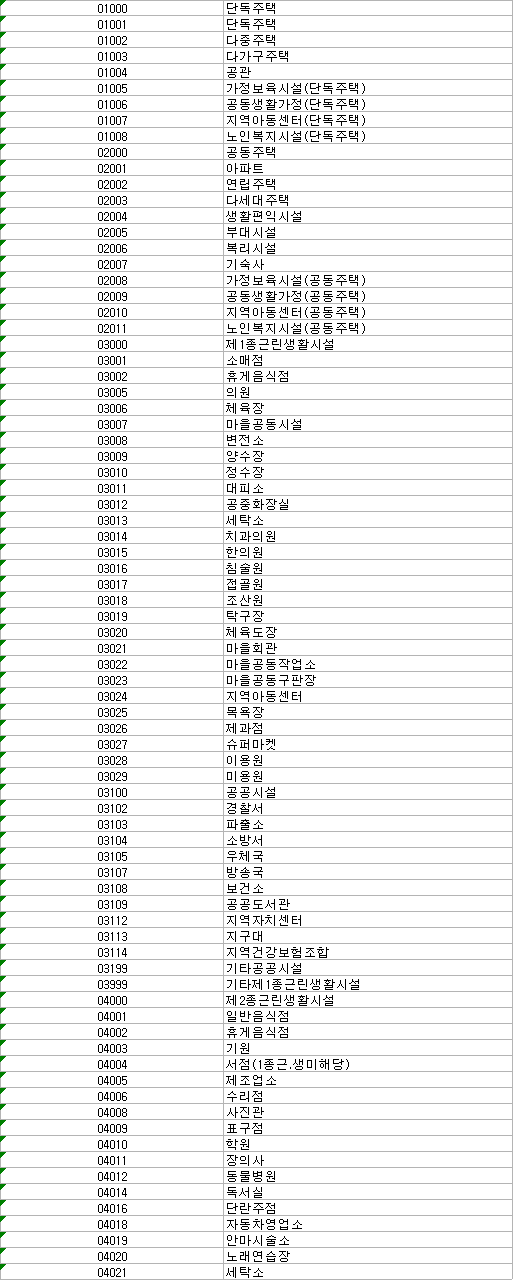

01000	단독주택
01001	단독주택
01002	다중주택
01003	다가구주택
01004	공관
01005	가정보육시설(단독주택)
01006	공동생활가정(단독주택)
01007	지역아동센터(단독주택)
01008	노인복지시설(단독주택)
02000	공동주택
02001	아파트
02002	연립주택
02003	다세대주택
02004	생활편익시설
02005	부대시설
02006	복리시설
02007	기숙사
02008	가정보육시설(공동주택)
02009	공동생활가정(공동주택)
02010	지역아동센터(공동주택)
02011	노인복지시설(공동주택)
03000	제1종근린생활시설
03001	소매점
03002	휴게음식점
03005	의원
03006	체육장
03007	마을공동시설
03008	변전소
03009	양수장
03010	정수장
03011	대피소
03012	공중화장실
03013	세탁소
03014	치과의원
03015	한의원
03016	침술원
03017	접골원
03018	조산원
03019	탁구장
03020	체육도장
03021	마을회관
03022	마을공동작업소
03023	마을공동구판장
03024	지역아동센터
03025	목욕장
03026	제과점
03027	슈퍼마켓
03028	이용원
03029	미용원
03100	공공시설
03102	경찰서
03103	파출소
03104	소방서
03105	우체국
03107	방송국
03108	보건소
03109	공공도서관
03112	지역자치센터
03113	지구대
03114	지역건강보험조합
03199	기타공공시설
03999	기타제1종근린생활시설
04000	제2종근린생활시설
04001	일반음식점
04002	휴게음식점
04003	기원
04004	서점(1종근.생미해당)
04005	제조업소
04006	수리점
04008	사진관
04009	표구점
04010	학원
04011	장의사
04012	동물병원
04014	독서실
04016	단란주점
04018	자동차영업소
04019	안마시술소
04020	노래연습장
04021	세탁소
04024	직업훈련소
04030	의약품판매소
04031	의료기기판매소
04032	총포판매사
04033	소개업
04034	안마원
04035	고시원
04036	제과점
04037	인터넷컴퓨터게임시설제공업의시설
04038	청소년게임제공업의시설
04039	복합유통게임제공업의시설
04100	운동시설
04101	테니스장
04102	체력단련장
04103	에어로빅장
04104	볼링장
04105	당구장
04106	실내낚시터
04107	골프연습장
04108	물놀이형시설
04199	기타운동시설
04200	종교집회장
04201	교회
04202	성당
04203	사찰
04204	기도원
04205	수도원
04206	수녀원
04207	제실
04208	사당
04299	기타종교집회장
04300	공연장
04302	음악당
04303	연예장
04304	비디오물감상실
04305	비디오물소극장
04306	극장
04307	영화관
04308	서커스장
04399	기타공연장
04400	사무소
04401	금융업소
04402	사무소
04403	부동산중개업소
04404	결혼상담소
04405	출판사
04499	기타사무소
04999	기타제2종근생활시설
05000	문화및집회시설
05100	공연장
05102	음악당
05103	연예장
05104	서어커스장
05105	비디오물감상실
05106	비디오물소극장
05107	극장
05108	영화관
05199	기타공연장
05200	집회장
05201	예식장
05202	회의장
05203	공회당
05204	마권장외발매소
05205	마권전화투표소
05299	기타집회장
05300	관람장
05301	경마장
05302	자동차경기장
05303	체육관
05304	운동장
05305	경륜장
05306	경정장
05399	기타관람장
05400	전시장
05401	박물관
05402	미술관
05403	과학관
05404	기념관
05405	산업전시장
05406	박람회장
05407	문화관
05408	체험관
05499	기타전시장
05500	동.식물원 
05501	동물원
05502	식물원
05503	수족관
05599	기타동.식물원 
05999	기타문화및집회시설
06000	종교시설
06100	종교집회장
06101	교회
06102	성당
06103	사찰
06104	기도원
06105	수도원
06106	수녀원
06107	제실
06108	사당
06109	납골당(제2종근생 제외)
06110	봉안당
06199	기타종교집회장
06999	기타종교시설
07000	판매시설
07100	소매시장
07101	시장
07102	백화점
07103	대형백화점
07104	대형점
07105	쇼핑센터
07199	기타소매시장
07201	상점
07209	청소년게임제공업의시설
07210	복합유통게임제공업의 시설
07211	인터넷컴퓨터게임시설제공업의시설
07212	일반게임제공업의시설
07300	도매시장
07301	농수산물도매시장
07302	농수산물공판장
07399	기타도매시장
07999	기타판매시설
08000	운수시설
08001	여객자동차터미널
08004	공항시설
08007	철도시설
08008	항만시설
08999	기타운수시설
09000	의료시설
09100	병원
09101	종합병원
09102	산부인과병원
09103	치과병원
09104	한방병원
09105	정신병원
09107	병원
09109	요양병원
09199	기타병원
09200	격리병원
09201	전염병원
09202	마약진료소
09299	기타격리병원
09999	기타의료시설
10000	교육연구시설
10002	직업훈련소
10003	학원
10005	도서관
10100	학교
10101	초등학교
10102	중학교
10103	고등학교
10104	대학교
10105	전문대학
10106	대학
10107	유치원
10199	기타학교
10200	교육원
10201	교육원
10202	연수원 
10299	기타교육원
10300	연구소
10301	연구소
10302	시험소
10303	계측계량소
10399	기타연구소
10999	기타교육연구시설
11000	노유자시설
11100	아동관련시설
11102	영유아보육시설
11103	어린이집
11104	아동복지시설
11199	기타아동관련시설
11201	노인복지시설
11202	사회복지시설
11203	근로복지시설
11999	기타노유자시설
12000	수련시설
12001	유스호스텔
12100	생활권수련시설
12103	청소년문화의집
12104	청소년특화시설
12105	청소년수련관
12199	기타생활권수련시설
12200	자연권수련시설
12202	청소년야영장
12203	청소년수련원
12299	기타자연권수련시설
13000	운동시설
13001	체육관
13003	탁구장
13004	체육도장
13005	테니스장
13006	체력단련장
13007	에어로빅장
13008	볼링장
13009	당구장
13010	실내낚시터
13011	골프연습장
13012	물놀이형시설
13013	스크린골프장
13100	운동장
13101	육상장
13102	구기장
13103	볼링장
13104	수영장
13105	스케이트장
13106	롤러스케이트장
13107	승마장
13108	사격장
13109	궁도장
13110	골프장
13999	기타 운동시설
14000	업무시설
14100	공공업무시설
14101	국가기관청사
14102	자치단체청사
14103	외국공관
14199	기타공공업무시설
14200	일반업무시설
14201	금융업소
14202	오피스텔
14203	신문사
14204	사무소
14299	기타일반업무시설
15000	숙박시설
15001	고시원
15100	일반숙박시설
15101	호텔
15102	여관
15103	여인숙
15199	기타일반숙박시설
15200	관광숙박시설
15201	관광호텔
15202	수상관광호텔
15203	한국전통호텔
15204	가족호텔
15205	휴양콘도미니엄
15299	기타관광숙박시설
15999	기타숙박시설
16000	위락시설
16001	단란주점 
16002	유흥주점
16005	투전기업소
16007	주점영업
16009	유원시설업의시설
16010	무도장
16011	무도학원
16012	카지노영업소
16013	사행행위업소
16999	기타위락시설
17000	공장
17200	유해공장
17311	물품 제조공장
17312	물품 가공공장
17313	물품 염색공장
17314	물품 도장공장
17315	물품 표백공장
17316	물품 재봉공장
17317	물품 건조공장
17318	물품 인쇄공장
17319	물품 수리공장
17999	기타공장
18000	창고시설
18002	하역장
18003	물류터미널
18004	집배송시설
18100	창고
18101	일반창고
18102	냉장창고
18103	내동창고
18999	기타창고시설
19000	위험물저장및처리시설
19001	주유소
19002	액화석유가스충전소
19003	위험물제조소
19004	위험물저장소
19005	액화가스취급소
19006	액화가스판매소
19009	석유판매소
19010	위험물취급소
19011	액화석유가스판매소
19012	액화석유가스저장소
19013	유독물보관소
19014	유독물저장소
19015	유독물판매시설
19016	고압가스충전소
19017	고압가스판매소
19018	고압가스저장소
19019	도료류판매소
19020	도시가스공급시설
19021	화약류저장소 
19999	기타위험물저장처리시설
20000	자동차관련시설
20001	주차장
20002	세차장
20003	폐차장
20004	검사장
20005	매매장
20006	정비공장
20007	운전학원
20008	정비학원
20009	차고
20010	주기장
20999	기타자동차관련시설
21000	동.식물관련시설
21001	도축장
21002	도계장
21004	종묘배양시설 
21005	온실
21006	작물재배사
21100	축사
21101	축사
21102	양잠
21103	양봉
21104	양어시설
21105	부화장
21200	가축시설
21201	가축용운동시설
21202	인공수정센터
21203	관리사
21204	가축용창고
21205	가축시장
21206	동물검역소
21207	실험동물사육시설
21299	기타가축시설
21999	기타동식물관련시설
22000	분뇨.쓰레기처리시설
22001	분뇨처리시설
22002	폐기물처리시설
22004	고물상
22005	폐기물감량화시설
22999	기타분뇨쓰레기처리시설
23000	교정및군사시설
23001	감화원
23003	국방·군사시설
23004	보호관찰소
23005	갱생보호소
23006	소년원
23007	소년분류심사원
23200	교정시설
23201	보호감호소
23202	구치소
23203	교도소
23999	기타교정및군사시설
24000	방송통신시설
24002	전신전화국
24003	촬영소
24004	통신용시설
24100	방송국
24101	방송국
24102	방송프로그램제작시설
24103	송신시설
24104	수신시설
24105	중계시설
24999	기타방송통신시설
25000	발전시설
25001	발전소
25999	기타발전시설
26000	묘지관련시설
26003	묘지에 부수되는 건축물
26004	화장시설
26005	자연장지에 부수되는 건축물
26006	봉안당
26999	기타묘지관련시설
27000	관광휴게시설
27001	야외음악당
27002	야외극장
27003	어린이회관
27004	관망탑
27005	휴게소
27007	공원에 부수되는 시설
27008	유원지에 부수되는 시설
27009	관광지에 부수되는 시설
27999	기타관광휴게시설
28000	가설건축물
28001	재해복구용가설건축물
28002	가설흥행장
28003	가설전람회장
28004	공사용가설건축물
28005	견본주택
28006	가설점포
28007	경비용가설건축물
28008	임시자동차차고
28009	임시사무실
28010	임시창고
28011	임시숙소
28012	농,어업용비닐하우스
28013	가축용가설건축물
28014	농,어업용고정식온실
28015	창고용천막
28016	관광문화행사용가설건축물
28999	기타가설건축물
29000	장례식장
29001	장례식장

In [197]:
text = '01000 단독주택 01001 단독주택 01002 다중주택 01003 다가구주택 01004 공관 01005 가정보육시설(단독주택) 01006 공동생활가정(단독주택) 01007 지역아동센터(단독주택) 01008 노인복지시설(단독주택) 02000 공동주택 02001 아파트 02002 연립주택 02003 다세대주택 02004 생활편익시설 02005 부대시설 02006 복리시설 02007 기숙사 02008 가정보육시설(공동주택) 02009 공동생활가정(공동주택) 02010 지역아동센터(공동주택) 02011 노인복지시설(공동주택) 03000 제1종근린생활시설 03001 소매점 03002 휴게음식점 03005 의원 03006 체육장 03007 마을공동시설 03008 변전소 03009 양수장 03010 정수장 03011 대피소 03012 공중화장실 03013 세탁소 03014 치과의원 03015 한의원 03016 침술원 03017 접골원 03018 조산원 03019 탁구장 03020 체육도장 03021 마을회관 03022 마을공동작업소 03023 마을공동구판장 03024 지역아동센터 03025 목욕장 03026 제과점 03027 슈퍼마켓 03028 이용원 03029 미용원 03100 공공시설 03102 경찰서 03103 파출소 03104 소방서 03105 우체국 03107 방송국 03108 보건소 03109 공공도서관 03112 지역자치센터 03113 지구대 03114 지역건강보험조합 03199 기타공공시설 03999 기타제1종근린생활시설 04000 제2종근린생활시설 04001 일반음식점 04002 휴게음식점 04003 기원 04004 서점(1종근.생미해당) 04005 제조업소 04006 수리점 04008 사진관 04009 표구점 04010 학원 04011 장의사 04012 동물병원 04014 독서실 04016 단란주점 04018 자동차영업소 04019 안마시술소 04020 노래연습장 04021 세탁소 04024 직업훈련소 04030 의약품판매소 04031 의료기기판매소 04032 총포판매사 04033 소개업 04034 안마원 04035 고시원 04036 제과점 04037 인터넷컴퓨터게임시설제공업의시설 04038 청소년게임제공업의시설 04039 복합유통게임제공업의시설 04100 운동시설 04101 테니스장 04102 체력단련장 04103 에어로빅장 04104 볼링장 04105 당구장 04106 실내낚시터 04107 골프연습장 04108 물놀이형시설 04199 기타운동시설 04200 종교집회장 04201 교회 04202 성당 04203 사찰 04204 기도원 04205 수도원 04206 수녀원 04207 제실 04208 사당 04299 기타종교집회장 04300 공연장 04302 음악당 04303 연예장 04304 비디오물감상실 04305 비디오물소극장 04306 극장 04307 영화관 04308 서커스장 04399 기타공연장 04400 사무소 04401 금융업소 04402 사무소 04403 부동산중개업소 04404 결혼상담소 04405 출판사 04499 기타사무소 04999 기타제2종근생활시설 05000 문화및집회시설 05100 공연장 05102 음악당 05103 연예장 05104 서어커스장 05105 비디오물감상실 05106 비디오물소극장 05107 극장 05108 영화관 05199 기타공연장 05200 집회장 05201 예식장 05202 회의장 05203 공회당 05204 마권장외발매소 05205 마권전화투표소 05299 기타집회장 05300 관람장 05301 경마장 05302 자동차경기장 05303 체육관 05304 운동장 05305 경륜장 05306 경정장 05399 기타관람장 05400 전시장 05401 박물관 05402 미술관 05403 과학관 05404 기념관 05405 산업전시장 05406 박람회장 05407 문화관 05408 체험관 05499 기타전시장 05500 동.식물원 05501 동물원 05502 식물원 05503 수족관 05599 기타동.식물원 05999 기타문화및집회시설 06000 종교시설 06100 종교집회장 06101 교회 06102 성당 06103 사찰 06104 기도원 06105 수도원 06106 수녀원 06107 제실 06108 사당 06109 납골당(제2종근생 제외) 06110 봉안당 06199 기타종교집회장 06999 기타종교시설 07000 판매시설 07100 소매시장 07101 시장 07102 백화점 07103 대형백화점 07104 대형점 07105 쇼핑센터 07199 기타소매시장 07201 상점 07209 청소년게임제공업의시설 07210 복합유통게임제공업의 시설 07211 인터넷컴퓨터게임시설제공업의시설 07212 일반게임제공업의시설 07300 도매시장 07301 농수산물도매시장 07302 농수산물공판장 07399 기타도매시장 07999 기타판매시설 08000 운수시설 08001 여객자동차터미널 08004 공항시설 08007 철도시설 08008 항만시설 08999 기타운수시설 09000 의료시설 09100 병원 09101 종합병원 09102 산부인과병원 09103 치과병원 09104 한방병원 09105 정신병원 09107 병원 09109 요양병원 09199 기타병원 09200 격리병원 09201 전염병원 09202 마약진료소 09299 기타격리병원 09999 기타의료시설 10000 교육연구시설 10002 직업훈련소 10003 학원 10005 도서관 10100 학교 10101 초등학교 10102 중학교 10103 고등학교 10104 대학교 10105 전문대학 10106 대학 10107 유치원 10199 기타학교 10200 교육원 10201 교육원 10202 연수원 10299 기타교육원 10300 연구소 10301 연구소 10302 시험소 10303 계측계량소 10399 기타연구소 10999 기타교육연구시설 11000 노유자시설 11100 아동관련시설 11102 영유아보육시설 11103 어린이집 11104 아동복지시설 11199 기타아동관련시설 11201 노인복지시설 11202 사회복지시설 11203 근로복지시설 11999 기타노유자시설 12000 수련시설 12001 유스호스텔 12100 생활권수련시설 12103 청소년문화의집 12104 청소년특화시설 12105 청소년수련관 12199 기타생활권수련시설 12200 자연권수련시설 12202 청소년야영장 12203 청소년수련원 12299 기타자연권수련시설 13000 운동시설 13001 체육관 13003 탁구장 13004 체육도장 13005 테니스장 13006 체력단련장 13007 에어로빅장 13008 볼링장 13009 당구장 13010 실내낚시터 13011 골프연습장 13012 물놀이형시설 13013 스크린골프장 13100 운동장 13101 육상장 13102 구기장 13103 볼링장 13104 수영장 13105 스케이트장 13106 롤러스케이트장 13107 승마장 13108 사격장 13109 궁도장 13110 골프장 13999 기타 운동시설 14000 업무시설 14100 공공업무시설 14101 국가기관청사 14102 자치단체청사 14103 외국공관 14199 기타공공업무시설 14200 일반업무시설 14201 금융업소 14202 오피스텔 14203 신문사 14204 사무소 14299 기타일반업무시설 15000 숙박시설 15001 고시원 15100 일반숙박시설 15101 호텔 15102 여관 15103 여인숙 15199 기타일반숙박시설 15200 관광숙박시설 15201 관광호텔 15202 수상관광호텔 15203 한국전통호텔 15204 가족호텔 15205 휴양콘도미니엄 15299 기타관광숙박시설 15999 기타숙박시설 16000 위락시설 16001 단란주점 16002 유흥주점 16005 투전기업소 16007 주점영업 16009 유원시설업의시설 16010 무도장 16011 무도학원 16012 카지노영업소 16013 사행행위업소 16999 기타위락시설 17000 공장 17200 유해공장 17311 물품 제조공장 17312 물품 가공공장 17313 물품 염색공장 17314 물품 도장공장 17315 물품 표백공장 17316 물품 재봉공장 17317 물품 건조공장 17318 물품 인쇄공장 17319 물품 수리공장 17999 기타공장 18000 창고시설 18002 하역장 18003 물류터미널 18004 집배송시설 18100 창고 18101 일반창고 18102 냉장창고 18103 내동창고 18999 기타창고시설 19000 위험물저장및처리시설 19001 주유소 19002 액화석유가스충전소 19003 위험물제조소 19004 위험물저장소 19005 액화가스취급소 19006 액화가스판매소 19009 석유판매소 19010 위험물취급소 19011 액화석유가스판매소 19012 액화석유가스저장소 19013 유독물보관소 19014 유독물저장소 19015 유독물판매시설 19016 고압가스충전소 19017 고압가스판매소 19018 고압가스저장소 19019 도료류판매소 19020 도시가스공급시설 19021 화약류저장소 19999 기타위험물저장처리시설 20000 자동차관련시설 20001 주차장 20002 세차장 20003 폐차장 20004 검사장 20005 매매장 20006 정비공장 20007 운전학원 20008 정비학원 20009 차고 20010 주기장 20999 기타자동차관련시설 21000 동.식물관련시설 21001 도축장 21002 도계장 21004 종묘배양시설 21005 온실 21006 작물재배사 21100 축사 21101 축사 21102 양잠 21103 양봉 21104 양어시설 21105 부화장 21200 가축시설 21201 가축용운동시설 21202 인공수정센터 21203 관리사 21204 가축용창고 21205 가축시장 21206 동물검역소 21207 실험동물사육시설 21299 기타가축시설 21999 기타동식물관련시설 22000 분뇨.쓰레기처리시설 22001 분뇨처리시설 22002 폐기물처리시설 22004 고물상 22005 폐기물감량화시설 22999 기타분뇨쓰레기처리시설 23000 교정및군사시설 23001 감화원 23003 국방·군사시설 23004 보호관찰소 23005 갱생보호소 23006 소년원 23007 소년분류심사원 23200 교정시설 23201 보호감호소 23202 구치소 23203 교도소 23999 기타교정및군사시설 24000 방송통신시설 24002 전신전화국 24003 촬영소 24004 통신용시설 24100 방송국 24101 방송국 24102 방송프로그램제작시설 24103 송신시설 24104 수신시설 24105 중계시설 24999 기타방송통신시설 25000 발전시설 25001 발전소 25999 기타발전시설 26000 묘지관련시설 26003 묘지에 부수되는 건축물 26004 화장시설 26005 자연장지에 부수되는 건축물 26006 봉안당 26999 기타묘지관련시설 27000 관광휴게시설 27001 야외음악당 27002 야외극장 27003 어린이회관 27004 관망탑 27005 휴게소 27007 공원에 부수되는 시설 27008 유원지에 부수되는 시설 27009 관광지에 부수되는 시설 27999 기타관광휴게시설 28000 가설건축물 28001 재해복구용가설건축물 28002 가설흥행장 28003 가설전람회장 28004 공사용가설건축물 28005 견본주택 28006 가설점포 28007 경비용가설건축물 28008 임시자동차차고 28009 임시사무실 28010 임시창고 28011 임시숙소 28012 농,어업용비닐하우스 28013 가축용가설건축물 28014 농,어업용고정식온실 28015 창고용천막 28016 관광문화행사용가설건축물 28999 기타가설건축물 29000 장례식장 29001 장례식장'

In [198]:
import re

code = re.findall('\d{5}', text)
code

['01000',
 '01001',
 '01002',
 '01003',
 '01004',
 '01005',
 '01006',
 '01007',
 '01008',
 '02000',
 '02001',
 '02002',
 '02003',
 '02004',
 '02005',
 '02006',
 '02007',
 '02008',
 '02009',
 '02010',
 '02011',
 '03000',
 '03001',
 '03002',
 '03005',
 '03006',
 '03007',
 '03008',
 '03009',
 '03010',
 '03011',
 '03012',
 '03013',
 '03014',
 '03015',
 '03016',
 '03017',
 '03018',
 '03019',
 '03020',
 '03021',
 '03022',
 '03023',
 '03024',
 '03025',
 '03026',
 '03027',
 '03028',
 '03029',
 '03100',
 '03102',
 '03103',
 '03104',
 '03105',
 '03107',
 '03108',
 '03109',
 '03112',
 '03113',
 '03114',
 '03199',
 '03999',
 '04000',
 '04001',
 '04002',
 '04003',
 '04004',
 '04005',
 '04006',
 '04008',
 '04009',
 '04010',
 '04011',
 '04012',
 '04014',
 '04016',
 '04018',
 '04019',
 '04020',
 '04021',
 '04024',
 '04030',
 '04031',
 '04032',
 '04033',
 '04034',
 '04035',
 '04036',
 '04037',
 '04038',
 '04039',
 '04100',
 '04101',
 '04102',
 '04103',
 '04104',
 '04105',
 '04106',
 '04107',
 '04108',


In [200]:
code_name = re.sub('\d{5}', "!", text).split('!')
code_name = [t.strip() for t in code_name[1:]]
code_name

['단독주택',
 '단독주택',
 '다중주택',
 '다가구주택',
 '공관',
 '가정보육시설(단독주택)',
 '공동생활가정(단독주택)',
 '지역아동센터(단독주택)',
 '노인복지시설(단독주택)',
 '공동주택',
 '아파트',
 '연립주택',
 '다세대주택',
 '생활편익시설',
 '부대시설',
 '복리시설',
 '기숙사',
 '가정보육시설(공동주택)',
 '공동생활가정(공동주택)',
 '지역아동센터(공동주택)',
 '노인복지시설(공동주택)',
 '제1종근린생활시설',
 '소매점',
 '휴게음식점',
 '의원',
 '체육장',
 '마을공동시설',
 '변전소',
 '양수장',
 '정수장',
 '대피소',
 '공중화장실',
 '세탁소',
 '치과의원',
 '한의원',
 '침술원',
 '접골원',
 '조산원',
 '탁구장',
 '체육도장',
 '마을회관',
 '마을공동작업소',
 '마을공동구판장',
 '지역아동센터',
 '목욕장',
 '제과점',
 '슈퍼마켓',
 '이용원',
 '미용원',
 '공공시설',
 '경찰서',
 '파출소',
 '소방서',
 '우체국',
 '방송국',
 '보건소',
 '공공도서관',
 '지역자치센터',
 '지구대',
 '지역건강보험조합',
 '기타공공시설',
 '기타제1종근린생활시설',
 '제2종근린생활시설',
 '일반음식점',
 '휴게음식점',
 '기원',
 '서점(1종근.생미해당)',
 '제조업소',
 '수리점',
 '사진관',
 '표구점',
 '학원',
 '장의사',
 '동물병원',
 '독서실',
 '단란주점',
 '자동차영업소',
 '안마시술소',
 '노래연습장',
 '세탁소',
 '직업훈련소',
 '의약품판매소',
 '의료기기판매소',
 '총포판매사',
 '소개업',
 '안마원',
 '고시원',
 '제과점',
 '인터넷컴퓨터게임시설제공업의시설',
 '청소년게임제공업의시설',
 '복합유통게임제공업의시설',
 '운동시설',
 '테니스장',
 '체력단련장',
 '에어로빅장',
 '볼링장',
 '당구장',
 '실내낚시터',
 '골프연습

In [201]:
len(code), len(code_name)

(473, 473)

In [203]:
adress_code = pd.DataFrame([code, code_name]).T
adress_code.columns = ['code', 'code_name']
adress_code

,code,code_name
0,01000,단독주택
1,01001,단독주택
2,01002,다중주택
3,01003,다가구주택
4,01004,공관
...,...,...
468,28015,창고용천막
469,28016,관광문화행사용가설건축물
470,28999,기타가설건축물
471,29000,장례식장


In [204]:
adress_code.to_csv('/content/drive/My Drive/Compas/compas/csv 파일 여기로!/adress_code.csv', index=False)

In [207]:
# 도로명 주소 컬럼명 바꾸기 
for x in 도로명:
  for code, code_name in zip(adress_code['code'], adress_code['code_name']):
    if x[6:] == code:
      print(f"{x}.columns = ['좌표', 'CD_{x[6:]}_{code_name}']")

build_01003.columns = ['좌표', 'CD_01003_다가구주택']
build_02003.columns = ['좌표', 'CD_02003_다세대주택']
build_03999.columns = ['좌표', 'CD_03999_기타제1종근린생활시설']
build_03005.columns = ['좌표', 'CD_03005_의원']
build_01001.columns = ['좌표', 'CD_01001_단독주택']
build_13100.columns = ['좌표', 'CD_13100_운동장']
build_03001.columns = ['좌표', 'CD_03001_소매점']
build_16010.columns = ['좌표', 'CD_16010_무도장']
build_04001.columns = ['좌표', 'CD_04001_일반음식점']
build_03104.columns = ['좌표', 'CD_03104_소방서']
build_04005.columns = ['좌표', 'CD_04005_제조업소']
build_04010.columns = ['좌표', 'CD_04010_학원']
build_04004.columns = ['좌표', 'CD_04004_서점(1종근.생미해당)']
build_04999.columns = ['좌표', 'CD_04999_기타제2종근생활시설']
build_19003.columns = ['좌표', 'CD_19003_위험물제조소']
build_04006.columns = ['좌표', 'CD_04006_수리점']
build_02002.columns = ['좌표', 'CD_02002_연립주택']
build_01002.columns = ['좌표', 'CD_01002_다중주택']
build_04402.columns = ['좌표', 'CD_04402_사무소']
build_04403.columns = ['좌표', 'CD_04403_부동산중개업소']
build_17999.columns = ['좌표', 'CD_17999_기타공장']
build_10202.col